![image](https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/notebooks/headers/AutoAI-Banner_Experiment-Notebook.png)
# Experiment Notebook - AutoAI Notebook v1.19.2


This notebook contains the steps and code to demonstrate support of AutoAI experiments in the Watson Machine Learning service. It introduces Python API commands for data retrieval, training experiments, persisting pipelines, testing pipelines, refining pipelines, and scoring the resulting model.

**Note:** Notebook code generated using AutoAI will execute successfully. If code is modified or reordered, there is no guarantee it will successfully execute. For details, see: <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/autoai-notebook.html">Saving an Auto AI experiment as a notebook</a>


Some familiarity with Python is helpful. This notebook uses Python 3.10 and the `ibm_watson_machine_learning` package.


## Notebook goals

The learning goals of this notebook are:
-  Defining an AutoAI experiment
-  Training AutoAI models 
-  Comparing trained models
-  Deploying the model as a web service
-  Scoring the model to generate predictions



## Contents

This notebook contains the following parts:

**[Setup](#setup)**<br>
&nbsp;&nbsp;[Package installation](#install)<br>
&nbsp;&nbsp;[Watson Machine Learning connection](#connection)<br>
**[Experiment configuration](#configuration)**<br>
&nbsp;&nbsp;[Experiment metadata](#metadata)<br>
**[Working with completed AutoAI experiment](#work)**<br>
&nbsp;&nbsp;[Get fitted AutoAI optimizer](#get)<br>
&nbsp;&nbsp;[Pipelines comparison](#comparison)<br>
&nbsp;&nbsp;[Get pipeline as a scikit-learn pipeline model](#get_pipeline)<br>
&nbsp;&nbsp;[Inspect pipeline](#inspect_pipeline)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Visualize pipeline model](#visualize)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[Preview pipeline model as a Python code](#preview)<br>
**[Deploy and Score](#scoring)**<br>
&nbsp;&nbsp;[Working with spaces](#working_spaces)<br>
**[Running AutoAI experiment with Python API](#run)**<br>
**[Clean up](#cleanup)**<br>
**[Next steps](#next_steps)**<br>
**[Copyrights](#copyrights)**

<a id="setup"></a>
# Setup

<a id="install"></a>
## Package installation
Before you use the sample code in this notebook, install the following packages:
 - ibm-watson-machine-learning,
 - autoai-libs,
 - lale,
 - scikit-learn,
 - xgboost,
 - lightgbm,
 - snapml


In [1]:
!pip install ibm-watson-machine-learning | tail -n 1
!pip install autoai-libs==1.15.1 | tail -n 1
!pip install 'lale>=0.7,<0.8' | tail -n 1
!pip install scikit-learn==1.1.1 | tail -n 1
!pip install xgboost==1.6.2 | tail -n 1
!pip install lightgbm==3.3.2 | tail -n 1
!pip install 'snapml==1.13.0' | tail -n 1

Reason for being yanked: <none given>


<a id="configuration"></a>
# Experiment configuration

<a id="metadata"></a>
## Experiment metadata
This cell defines the metadata for the experiment, including: training_data_references, training_result_reference, experiment_metadata.

In [2]:
from ibm_watson_machine_learning.helpers import DataConnection
from ibm_watson_machine_learning.helpers import FSLocation

training_data_references = [
    DataConnection(
        data_asset_id='4aece0ce-3f8e-4554-886b-ca40e8b8a670'
    ),
]
training_result_reference = DataConnection(
    location=FSLocation(
        path='/projects/cc975324-6a4f-4e4e-a33a-c6922fe8976a/assets/auto_ml/154ce85b-38f8-4e8c-b312-26cc5a329406/wml_data/015bdae1-5dfd-47e6-bab0-496861d6e66f/data/automl'
    )
)

In [3]:
experiment_metadata = dict(
    prediction_type='binary',
    prediction_column='groundTruth',
    holdout_size=0.1,
    scoring='accuracy',
    csv_separator=',',
    random_state=33,
    max_number_of_estimators=2,
    training_data_references=training_data_references,
    training_result_reference=training_result_reference,
    project_id='cc975324-6a4f-4e4e-a33a-c6922fe8976a',
    positive_label='Risk',
    drop_duplicates=True,
    include_batched_ensemble_estimators=['BatchedTreeEnsembleClassifier(RandomForestClassifier)', 'BatchedTreeEnsembleClassifier(ExtraTreesClassifier)', 'BatchedTreeEnsembleClassifier(XGBClassifier)', 'BatchedTreeEnsembleClassifier(LGBMClassifier)', 'BatchedTreeEnsembleClassifier(SnapRandomForestClassifier)', 'BatchedTreeEnsembleClassifier(SnapBoostingMachineClassifier)']
)

<a id="connection"></a>
## Watson Machine Learning connection

This cell defines the credentials required to work with the Watson Machine Learning service.

**Action**: You need to pass yours Cloud Pak for Data instance home url.   
**Note**: If you want to run the notebook outside of the Watson Studio please provide Watson Machine Learning credentials: [Documentation](http://ibm-wml-api-pyclient.mybluemix.net/#id6)
```
wml_credentials = {  
    "instance_id": "openshift",  
    "token": "",  
    "url": "",  
    "version": "4.7"  
}
```

In [4]:
import os

wml_credentials = {
    "instance_id": "openshift",
    "url": os.environ.get("RUNTIME_ENV_APSX_URL"),
    "version": "4.7"
}

<a id="work"></a>


# Working with the completed AutoAI experiment

This cell imports the pipelines generated for the experiment. The best pipeline will be saved as a model.

<a id="get"></a>


## Get fitted AutoAI optimizer

In [5]:
from ibm_watson_machine_learning.experiment import AutoAI

pipeline_optimizer = AutoAI(wml_credentials, project_id=experiment_metadata['project_id']).runs.get_optimizer(metadata=experiment_metadata)

Use `get_params()` to retrieve configuration parameters.

In [6]:
pipeline_optimizer.get_params()

{'name': 'Aidc Sample',
 'desc': '',
 'prediction_type': 'classification',
 'prediction_column': 'groundTruth',
 'prediction_columns': None,
 'timestamp_column_name': None,
 'scoring': 'accuracy',
 'holdout_size': 0.1,
 'max_num_daub_ensembles': 2,
 't_shirt_size': 'c076e82c-b2a7-4d20-9c0f-1f0c2fdf5a24',
 'train_sample_rows_test_size': None,
 'include_only_estimators': None,
 'include_batched_ensemble_estimators': None,
 'backtest_num': None,
 'lookback_window': None,
 'forecast_window': None,
 'backtest_gap_length': None,
 'cognito_transform_names': None,
 'data_join_graph': False,
 'csv_separator': ',',
 'excel_sheet': None,
 'encoding': 'utf-8',
 'positive_label': None,
 'drop_duplicates': True,
 'outliers_columns': None,
 'text_processing': None,
 'word2vec_feature_number': None,
 'daub_give_priority_to_runtime': None,
 'text_columns_names': None,
 'sampling_type': None,
 'sample_size_limit': None,
 'sample_rows_limit': None,
 'sample_percentage_limit': None,
 'number_of_batch_rows

<a id="comparison"></a>
## Pipelines comparison

Use the `summary()` method to list trained pipelines and evaluation metrics information in
the form of a Pandas DataFrame. You can use the DataFrame to compare all discovered pipelines and select the one you like for further testing.

In [7]:
summary = pipeline_optimizer.summary()
best_pipeline_name = list(summary.index)[0]
summary

,Enhancements,Estimator,training_accuracy_(optimized),training_roc_auc,holdout_average_precision,holdout_log_loss,holdout_roc_auc,training_balanced_accuracy,training_f1,holdout_precision,training_average_precision,training_log_loss,holdout_recall,training_precision,holdout_accuracy,holdout_balanced_accuracy,training_recall,holdout_f1
Pipeline Name,,,,,,,,,,,,,,,,,,
Pipeline_1,,SnapRandomForestClassifier,0.780799,0.828683,0.716447,0.488709,0.811578,0.728232,0.634821,0.762295,0.741544,0.478959,0.560241,0.720903,0.793939,0.736048,0.567873,0.645833
Pipeline_2,HPO,SnapRandomForestClassifier,0.796310,0.841649,0.713001,0.475652,0.815963,0.736612,0.646519,0.767857,0.761857,0.448016,0.518072,0.775225,0.785859,0.719522,0.554497,0.618705
Pipeline_3,"HPO, FE",SnapRandomForestClassifier,0.803503,0.841718,0.718557,0.478130,0.815313,0.741035,0.652739,0.763636,0.764280,0.445774,0.506024,0.802151,0.781818,0.713498,0.550474,0.608696
Pipeline_4,"HPO, FE, HPO",SnapRandomForestClassifier,0.803503,0.841718,0.718557,0.478130,0.815313,0.741035,0.652739,0.763636,0.764280,0.445774,0.506024,0.802151,0.781818,0.713498,0.550474,0.608696
Pipeline_5,"HPO, FE, HPO, Ensemble",BatchedTreeEnsembleClassifier(SnapRandomForest...,0.803503,0.841718,0.718557,0.478130,0.815313,0.741035,0.652739,0.763636,0.764280,0.445774,0.506024,0.802151,0.781818,0.713498,0.550474,0.608696
Pipeline_6,,RandomForestClassifier,0.751794,0.825864,0.699360,0.509392,0.805187,0.724055,0.633486,0.623529,0.734832,0.497434,0.638554,0.627979,0.749495,0.722013,0.639438,0.630952
Pipeline_7,HPO,RandomForestClassifier,0.751794,0.825864,0.699360,0.509392,0.805187,0.724055,0.633486,0.623529,0.734832,0.497434,0.638554,0.627979,0.749495,0.722013,0.639438,0.630952
Pipeline_8,"HPO, FE",RandomForestClassifier,0.768661,0.823108,0.678871,0.539319,0.787280,0.732459,0.643202,0.618750,0.734589,0.491659,0.596386,0.668604,0.741414,0.705488,0.622042,0.607362
Pipeline_9,"HPO, FE, HPO",RandomForestClassifier,0.768661,0.823108,0.678871,0.539319,0.787280,0.732459,0.643202,0.618750,0.734589,0.491659,0.596386,0.668604,0.741414,0.705488,0.622042,0.607362


<a id="get_pipeline"></a>
### Get pipeline as a scikit-learn pipeline model

After you compare the pipelines, download and save a scikit-learn pipeline model object from the
AutoAI training job.

**Tip:** To get a specific pipeline, pass the pipeline name in:
```
pipeline_optimizer.get_pipeline(pipeline_name=pipeline_name)
```

In [8]:
pipeline_model = pipeline_optimizer.get_pipeline()

Next, check the importance of features for selected pipeline.

In [9]:
pipeline_optimizer.get_pipeline_details()['features_importance']

,features_importance
Age,1.00
LoanAmount,0.72
LoanDuration,0.46
CreditHistory,0.39
ExistingCreditsCount,0.31
OwnsProperty,0.30
EmploymentDuration,0.28
InstallmentPercent,0.25
CurrentResidenceDuration,0.23
LoanPurpose,0.19


**Tip:** If you want to check all the details of the model evaluation metrics, use:
```
pipeline_optimizer.get_pipeline_details()
```

<a id="inspect_pipeline"></a>
## Inspect pipeline

<a id="visualize"></a>
### Visualize pipeline model

Preview pipeline model stages as a graph. Each node's name links to a detailed description of the stage.


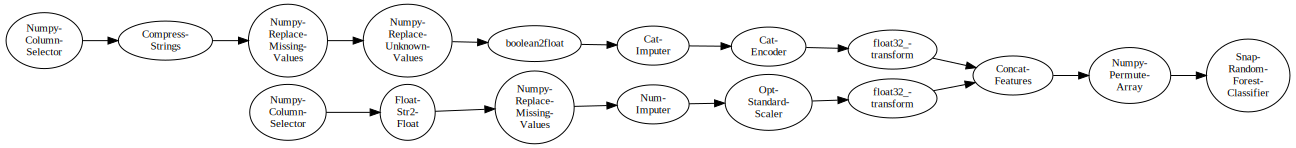

In [10]:
pipeline_model.visualize()

<a id="preview"></a>
### Preview pipeline model as a Python code
In the next cell, you can preview the saved pipeline model as a Python code.  
You can review the exact steps used to create the model.

**Note:** If you want to get sklearn representation, add the following parameter to the `pretty_print` call: `astype='sklearn'`.

In [11]:
pipeline_model.pretty_print(combinators=False, ipython_display=True)

```python
from autoai_libs.transformers.exportable import NumpyColumnSelector
from autoai_libs.transformers.exportable import CompressStrings
from autoai_libs.transformers.exportable import NumpyReplaceMissingValues
from autoai_libs.transformers.exportable import NumpyReplaceUnknownValues
from autoai_libs.transformers.exportable import boolean2float
from autoai_libs.transformers.exportable import CatImputer
from autoai_libs.transformers.exportable import CatEncoder
import numpy as np
from autoai_libs.transformers.exportable import float32_transform
from lale.operators import make_pipeline
from autoai_libs.transformers.exportable import FloatStr2Float
from autoai_libs.transformers.exportable import NumImputer
from autoai_libs.transformers.exportable import OptStandardScaler
from lale.operators import make_union
from autoai_libs.transformers.exportable import NumpyPermuteArray
from snapml import SnapRandomForestClassifier

numpy_column_selector_0 = NumpyColumnSelector(
    columns=[
        0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
    ]
)
compress_strings = CompressStrings(
    compress_type="hash",
    dtypes_list=[
        "char_str", "float_int_num", "char_str", "char_str", "char_str",
        "char_str", "float_int_num", "char_str", "char_str", "float_int_num",
        "char_str", "float_int_num", "char_str", "char_str", "float_int_num",
        "char_str", "float_int_num", "char_str", "char_str",
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
    misslist_list=[
        [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],
        [], [],
    ],
)
numpy_replace_missing_values_0 = NumpyReplaceMissingValues(
    filling_values=float("nan"), missing_values=[]
)
numpy_replace_unknown_values = NumpyReplaceUnknownValues(
    filling_values=float("nan"),
    filling_values_list=[
        float("nan"), 100001, float("nan"), float("nan"), float("nan"),
        float("nan"), 100001, float("nan"), float("nan"), 100001,
        float("nan"), 100001, float("nan"), float("nan"), 100001,
        float("nan"), 100001, float("nan"), float("nan"),
    ],
    missing_values_reference_list=["", "-", "?", float("nan")],
)
cat_imputer = CatImputer(
    missing_values=float("nan"),
    sklearn_version_family="1",
    strategy="most_frequent",
)
cat_encoder = CatEncoder(
    dtype=np.float64, handle_unknown="error", sklearn_version_family="1"
)
pipeline_0 = make_pipeline(
    numpy_column_selector_0,
    compress_strings,
    numpy_replace_missing_values_0,
    numpy_replace_unknown_values,
    boolean2float(),
    cat_imputer,
    cat_encoder,
    float32_transform(),
)
numpy_column_selector_1 = NumpyColumnSelector(columns=[4])
float_str2_float = FloatStr2Float(
    dtypes_list=["float_int_num"], missing_values_reference_list=[]
)
numpy_replace_missing_values_1 = NumpyReplaceMissingValues(
    filling_values=float("nan"), missing_values=[]
)
num_imputer = NumImputer(missing_values=float("nan"), strategy="median")
opt_standard_scaler = OptStandardScaler(use_scaler_flag=False)
pipeline_1 = make_pipeline(
    numpy_column_selector_1,
    float_str2_float,
    numpy_replace_missing_values_1,
    num_imputer,
    opt_standard_scaler,
    float32_transform(),
)
union = make_union(pipeline_0, pipeline_1)
numpy_permute_array = NumpyPermuteArray(
    axis=0,
    permutation_indices=[
        0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 4,
    ],
)
snap_random_forest_classifier = SnapRandomForestClassifier(
    compress_trees=True,
    gpu_ids=np.array([0], dtype=np.uint32),
    max_depth=10,
    n_jobs=4,
    random_state=33,
)
pipeline = make_pipeline(
    union, numpy_permute_array, snap_random_forest_classifier
)
```

### Calling the `predict` method
If you want to get a prediction by using the pipeline model object, call `pipeline_model.predict()`.

**Note:** If you want to work with a pure sklearn model:
 - add the following parameter to the `get_pipeline` call: `astype='sklearn'`,
 - or `scikit_learn_pipeline = pipeline_model.export_to_sklearn_pipeline()`

<a id="scoring"></a>
## Deploy and Score

In this section you will learn how to deploy and score the model as a web service.

<a id="working_spaces"></a>
### Working with spaces

In this section you will specify a deployment space fto organize assets and then deploy and score the model. If you do not have an existing space, go to **Deployments** section and create a new space. Follow these steps:

- Click **New Deployment Space**
- Create an empty space
- View new space
- Go to **Manage** bookmark
- Copy `space_id` and paste it below

**Tip**: You can also use the API to prepare the space for your work. Learn more [here](https://github.com/IBM/watson-machine-learning-samples/blob/master/cpd4.0/notebooks/python_sdk/instance-management/Space%20management.ipynb).

**Action**: Assign or update space ID below.

### Deployment creation

In [12]:
target_space_id = "PUT_YOUR_TARGET_SPACE_ID_HERE"

from ibm_watson_machine_learning.deployment import WebService

service = WebService(
    source_wml_credentials=wml_credentials,
    target_wml_credentials=wml_credentials,
    source_project_id=experiment_metadata['project_id'],
    target_space_id=target_space_id
)
service.create(
    model=best_pipeline_name,
    metadata=experiment_metadata,
    deployment_name='Best_pipeline_webservice'
)

Cannot set Project or Space
Reason: Space with id 'PUT_YOUR_TARGET_SPACE_ID_HERE' does not exist


CannotSetProjectOrSpace: Cannot set Project or Space
Reason: Space with id 'PUT_YOUR_TARGET_SPACE_ID_HERE' does not exist

Use the `print` method for the deployment object to show basic information about the service: 

In [ ]:
print(service)

To show all available information about the deployment, use the `.get_params()` method.

In [ ]:
service.get_params()

### Scoring of webservice
You can make a scoring request by calling `score()` on the deployed pipeline.

If you want to work with the web service in an external Python application, follow these steps to retrieve the service object:

 - Initialize the service by `service = WebService(target_wml_credentials=wml_credentials,target_space_id=experiment_metadata['space_id'])`
 - Get deployment_id: `service.list()`
 - Get webservice object: `service.get('deployment_id')`

After that you can call `service.score(score_records_df)` method. The `score()` method accepts `pandas.DataFrame` objects. 

<a id="cleanup"></a>
### Deleting deployment
You can delete the existing deployment by calling the `service.delete()` command.
To list the existing web services, use the `service.list()` method.

<a id="run"></a>

## Running the AutoAI experiment with Python API

If you want to run the AutoAI experiment using the Python API, follow these steps. The experiment settings were generated basing on parameters set in the AutoAI UI.


```
from ibm_watson_machine_learning.experiment import AutoAI

experiment = AutoAI(wml_credentials, project_id=experiment_metadata['project_id'])
```

```
OPTIMIZER_NAME = 'custom_name'
```

```
from ibm_watson_machine_learning.helpers import DataConnection
from ibm_watson_machine_learning.helpers import FSLocation

training_data_references = [
    DataConnection(
        data_asset_id='4aece0ce-3f8e-4554-886b-ca40e8b8a670'
    ),
]
training_result_reference = DataConnection(
    location=FSLocation(
        path='/projects/cc975324-6a4f-4e4e-a33a-c6922fe8976a/assets/auto_ml/154ce85b-38f8-4e8c-b312-26cc5a329406/wml_data/015bdae1-5dfd-47e6-bab0-496861d6e66f/data/automl'
    )
)
```

The new pipeline optimizer will be created and training will be triggered.

```
pipeline_optimizer = experiment.optimizer(
    name=OPTIMIZER_NAME,
    prediction_type=experiment_metadata['prediction_type'],
    prediction_column=experiment_metadata['prediction_column'],
    scoring=experiment_metadata['scoring'],
    holdout_size=experiment_metadata['holdout_size'],
    csv_separator=experiment_metadata['csv_separator'],
    positive_label=experiment_metadata['positive_label'],
    drop_duplicates=experiment_metadata['drop_duplicates'],
    include_batched_ensemble_estimators=experiment_metadata['include_batched_ensemble_estimators'],
    incremental_learning=False,
)
```

```
pipeline_optimizer.fit(
    training_data_references=training_data_references,
    training_results_reference=training_result_reference,
    background_mode=False,
)
```


<a id="next_steps"></a>
# Next steps
You successfully completed this notebook!
You learned how to use ibm-watson-machine-learning to run and explore AutoAI experiments.
Check out the official [AutoAI site](https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_latest/cpd/overview/relnotes-4.0.html) for more samples, tutorials, documentation, how-tos, and blog posts.

<a id="copyrights"></a>
### Copyrights

Licensed Materials - Copyright © 2023 IBM. This notebook and its source code are released under the terms of the ILAN License.
Use, duplication disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

**Note:** The auto-generated notebooks are subject to the International License Agreement for Non-Warranted Programs (or equivalent) and License Information document for Watson Studio Auto-generated Notebook (License Terms), such agreements located in the link below. Specifically, the Source Components and Sample Materials clause included in the License Information document for Watson Studio Auto-generated Notebook applies to the auto-generated notebooks.  

By downloading, copying, accessing, or otherwise using the materials, you agree to the <a href="http://www14.software.ibm.com/cgi-bin/weblap/lap.pl?li_formnum=L-AMCU-BYC7LF">License Terms</a>  

___

# Finding the most optimal model with AIDC

### Import AIDC library and requirements

In [13]:
## Import AIDC libraries
!pip install /project_data/data_asset/aidc-1.3.zip --force-reinstall;
import aidc
import pandas as pd
import io
import matplotlib.pyplot as plt
import random
from IPython.utils import io as sio

Processing /project_data/data_asset/aidc-1.3.zip
  Preparing metadata (setup.py) ... done
  Created wheel for aidc: filename=aidc-1.3-py3-none-any.whl size=138109 sha256=a9c448bfa070d50815a2b6d831e9f73696ce13c1ce727b6710eb42af879aabdf
  Stored in directory: /tmp/1000710000/.cache/pip/wheels/36/35/e2/ffafef2711229494b6f5514e8d265d330c9b11bfa3285f4fce
Successfully built aidc


### Load the compelte dataset with human outputs

In [14]:
## Load complete dataset
dataset = pd.read_csv("/project_data/data_asset/credit_with_human.csv", sep=",",nrows=5500)
hClass=dataset['hClass']
test_dataset = dataset.drop(['groundTruth'], axis=1).drop(['hClass'],axis=1)
aidc_dataset= dataset
aidc_dataset

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,groundTruth,hClass
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,No Risk,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,No Risk,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,No Risk,Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,No Risk,Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,Risk,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,no_checking,8,prior_payments_delayed,repairs,1420,100_to_500,1_to_4,2,male,none,...,34,none,own,1,management_self-employed,2,yes,yes,No Risk,No Risk
4957,0_to_200,46,credits_paid_to_date,appliances,3924,100_to_500,1_to_4,3,female,none,...,32,none,own,1,skilled,1,none,yes,No Risk,No Risk
4958,0_to_200,18,prior_payments_delayed,radio_tv,250,100_to_500,less_1,1,female,none,...,19,stores,own,1,skilled,1,none,yes,No Risk,No Risk
4959,less_0,32,credits_paid_to_date,radio_tv,1515,greater_1000,greater_7,4,male,co-applicant,...,39,stores,own,1,skilled,1,yes,yes,No Risk,No Risk


### Generate machine learing results and probability scores using the suggested models 

In [15]:
## Collect results from all models
target_space_id = "d30dd29b-fc64-4679-b41d-4f864630e35a"
from ibm_watson_machine_learning.deployment import WebService
service = WebService(
    source_wml_credentials=wml_credentials,
    target_wml_credentials=wml_credentials,
    source_project_id=experiment_metadata['project_id'],
    target_space_id=target_space_id
)

mlClass_list=[]
mlConfidence_list=[]

for index in summary.index:
            
    print("Collecting: "+ index)
    
    #Silence the output
    with sio.capture_output() as captured:
        service.create(
            model=index,
            metadata=experiment_metadata,
            deployment_name='AIDC_deployment'
        )
    
        #Get predictions
        predictions = service.score(payload=test_dataset.iloc[:])
        results = predictions['predictions'][0]['values']
        
    service.delete()
    mlConfidence = []
    mlClass = []
    for i in range(len(results)):
        mlClass.append(results[i][0])
        mlConfidence.append(results[i][1][0])
        
    mlClass_list.append(mlClass)
    mlConfidence_list.append(mlConfidence)

Collecting: Pipeline_1
Collecting: Pipeline_2
Collecting: Pipeline_3
Collecting: Pipeline_4
Collecting: Pipeline_5
Collecting: Pipeline_6
Collecting: Pipeline_7
Collecting: Pipeline_8
Collecting: Pipeline_9
Collecting: Pipeline_10


### Change the size of the output window to be able to analyze the graphs

In [16]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px; 
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

### Generate default dispatch rules between human and AI

Processing: Pipeline_1


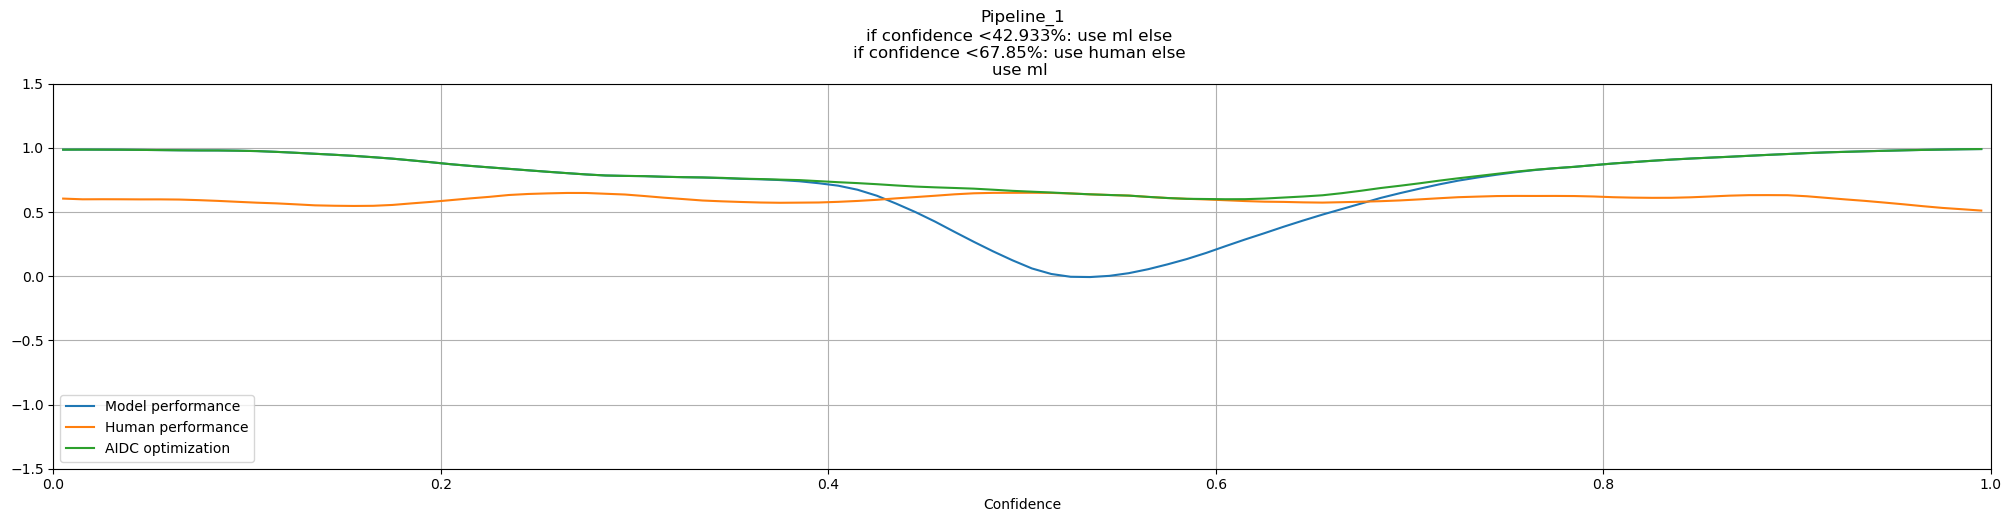

Processing: Pipeline_2


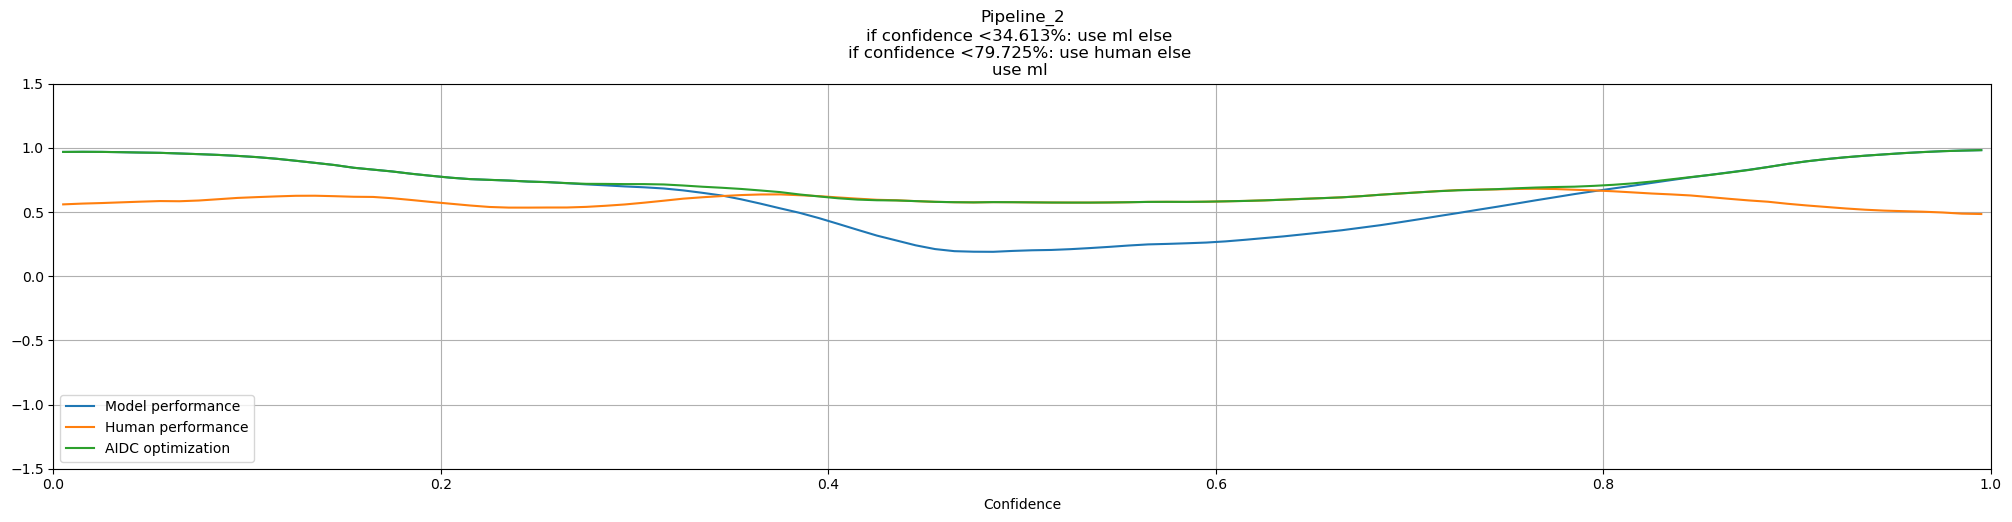

Processing: Pipeline_3


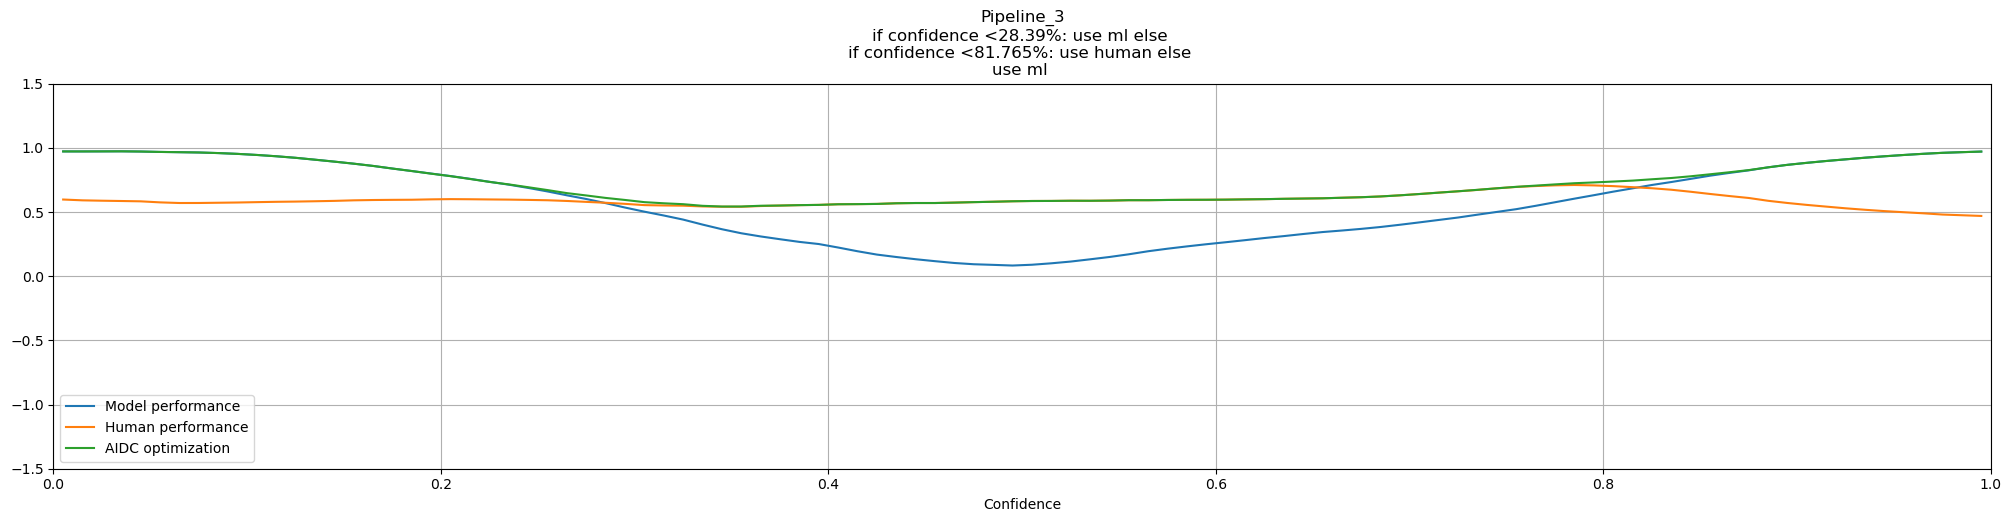

Processing: Pipeline_4


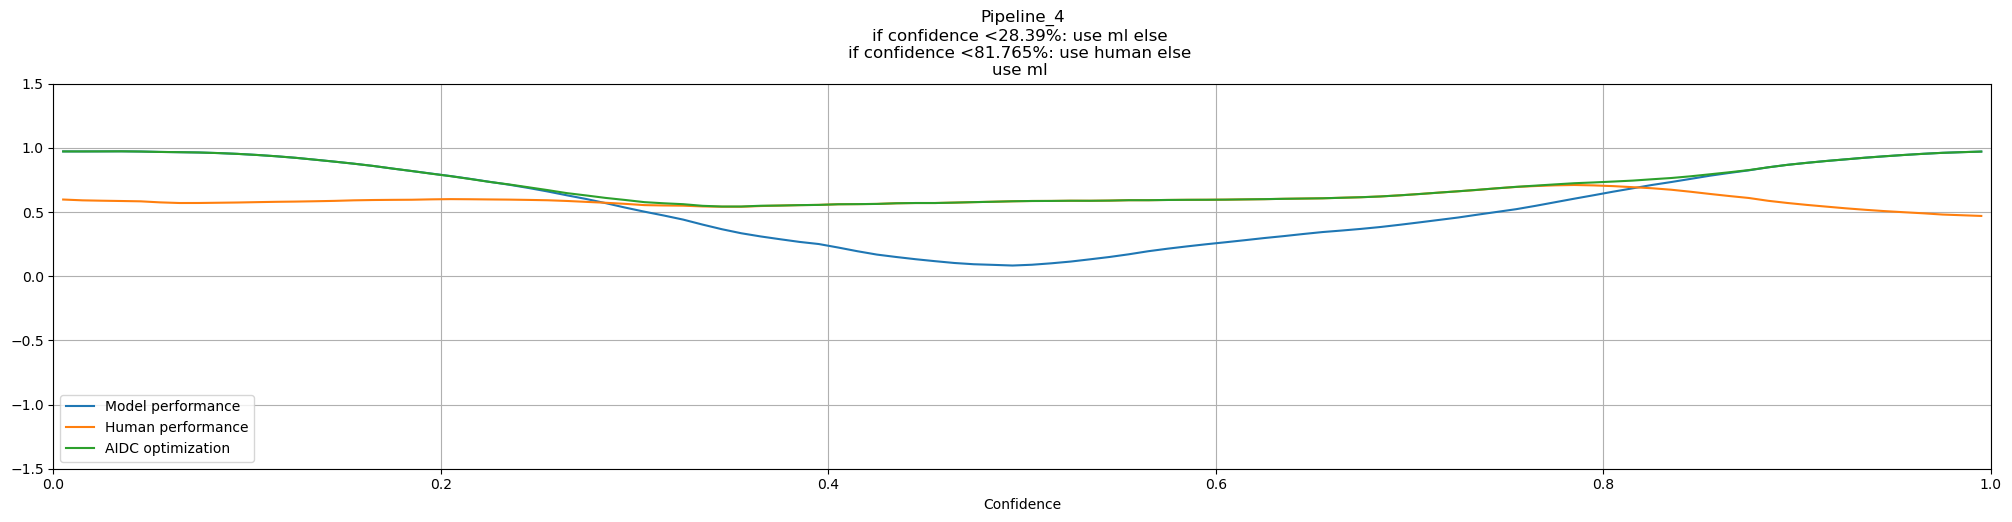

Processing: Pipeline_5


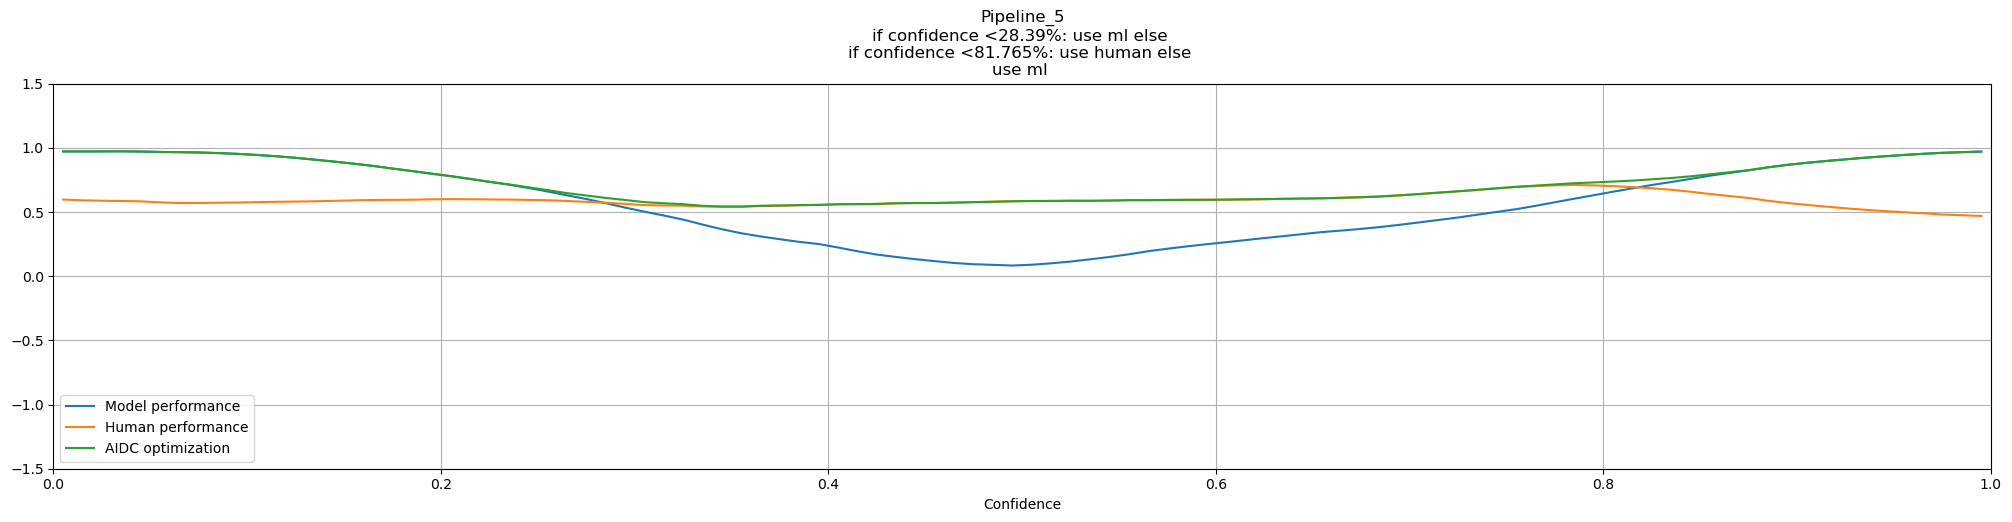

Processing: Pipeline_6


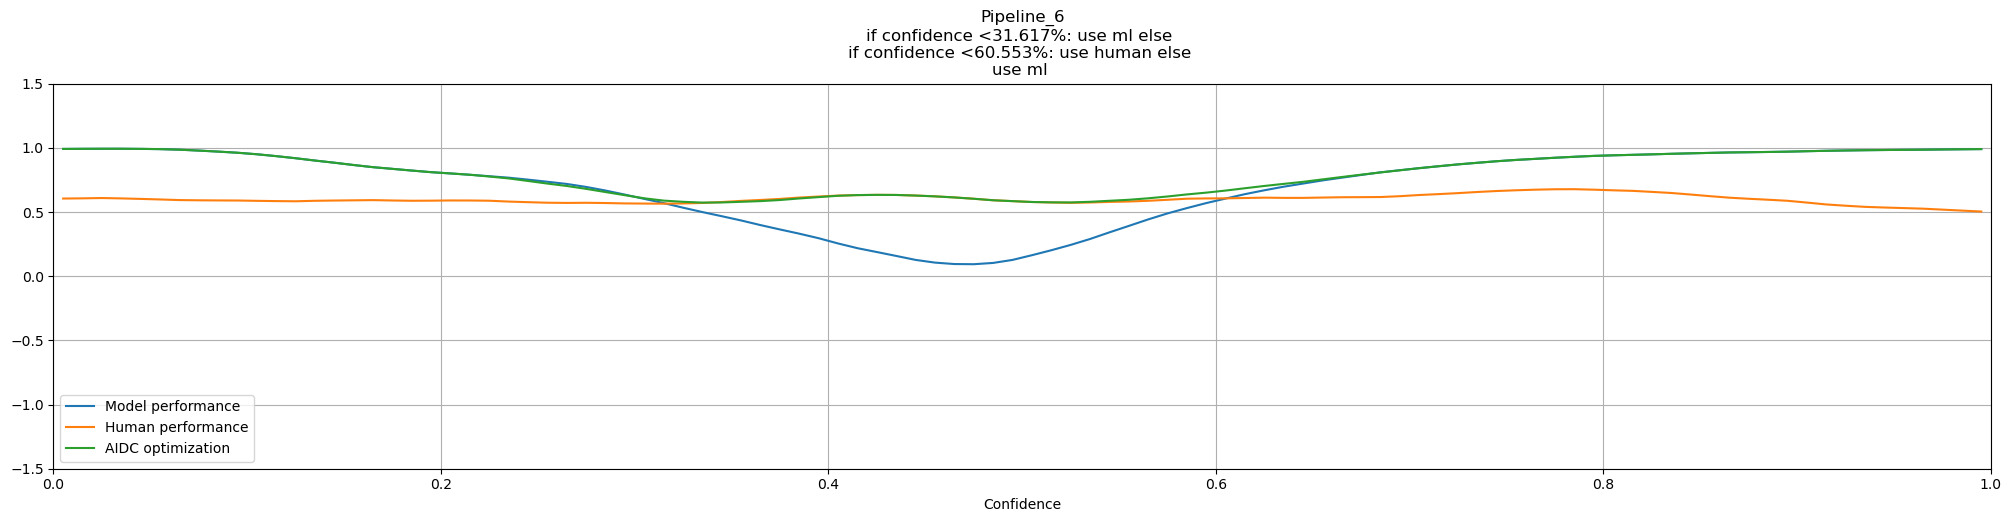

Processing: Pipeline_7


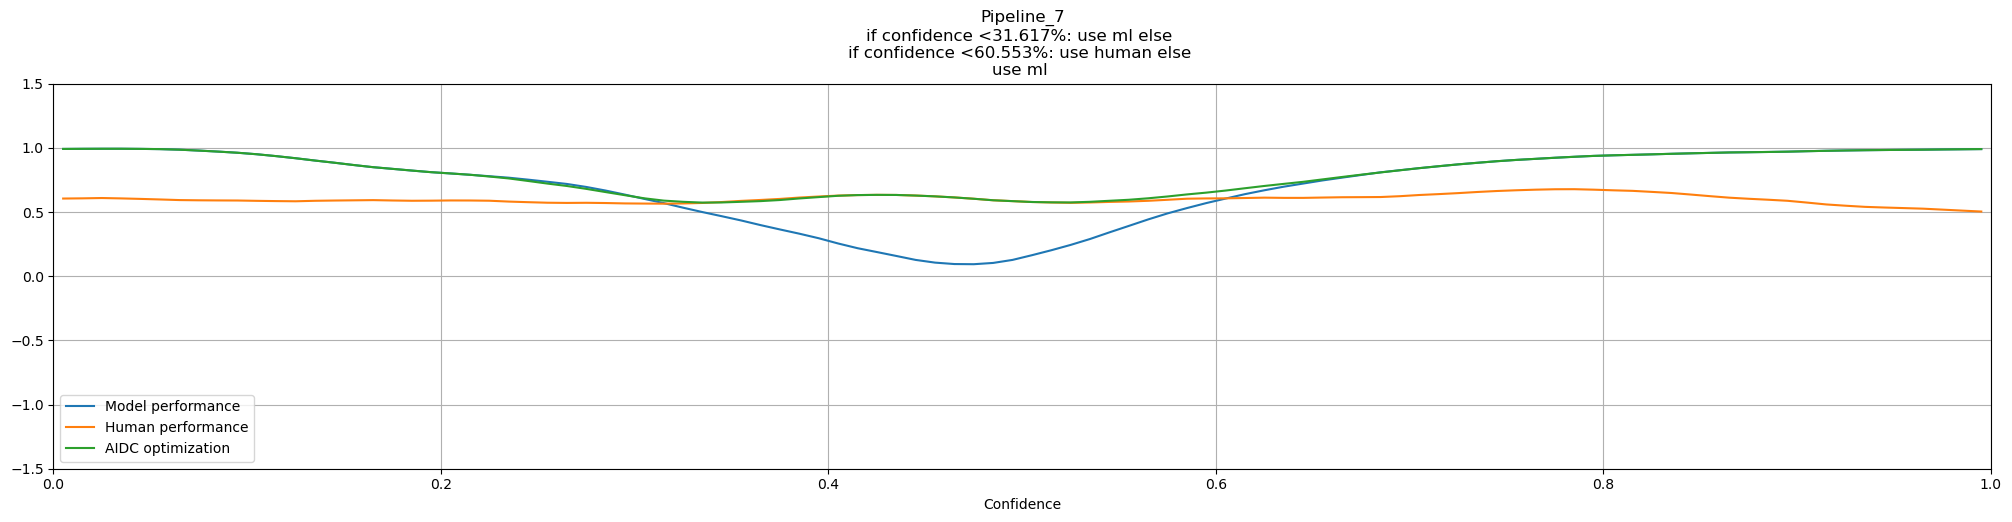

Processing: Pipeline_8


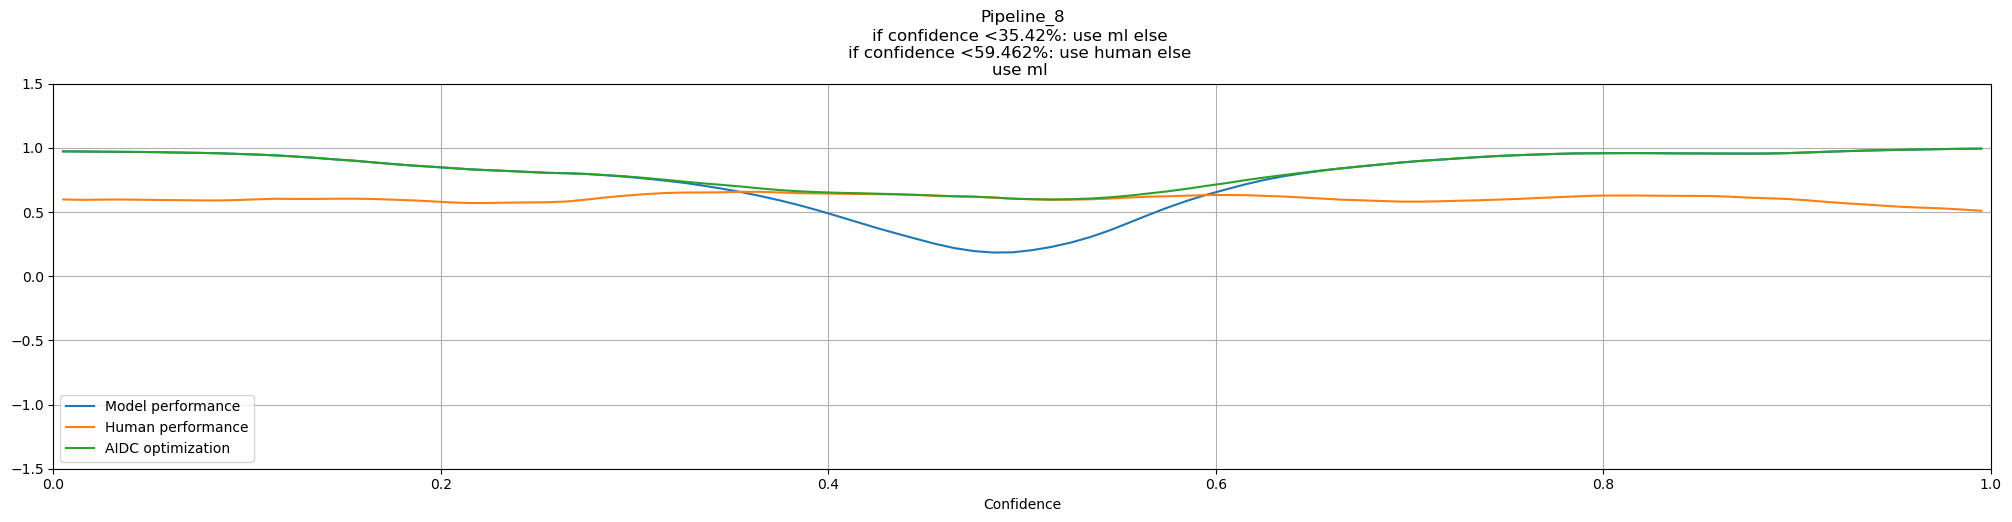

Processing: Pipeline_9


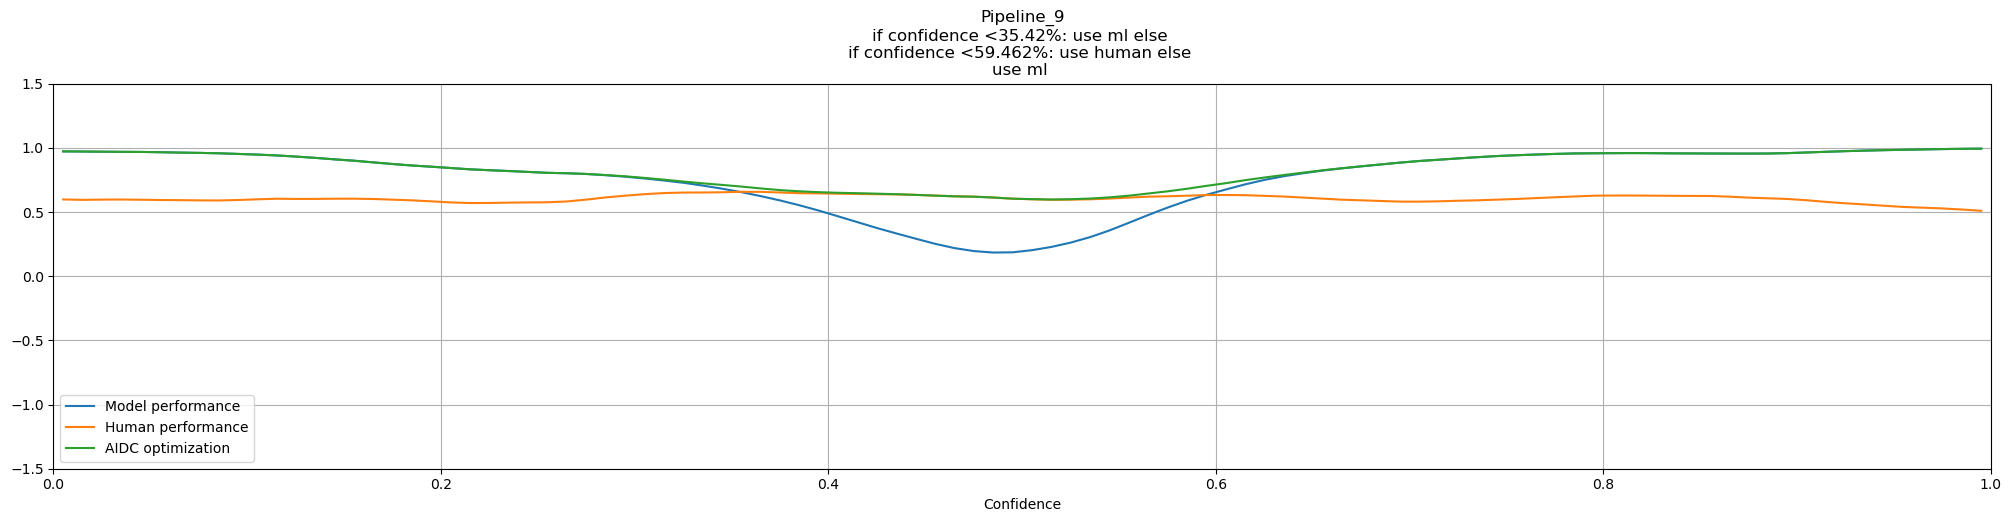

Processing: Pipeline_10


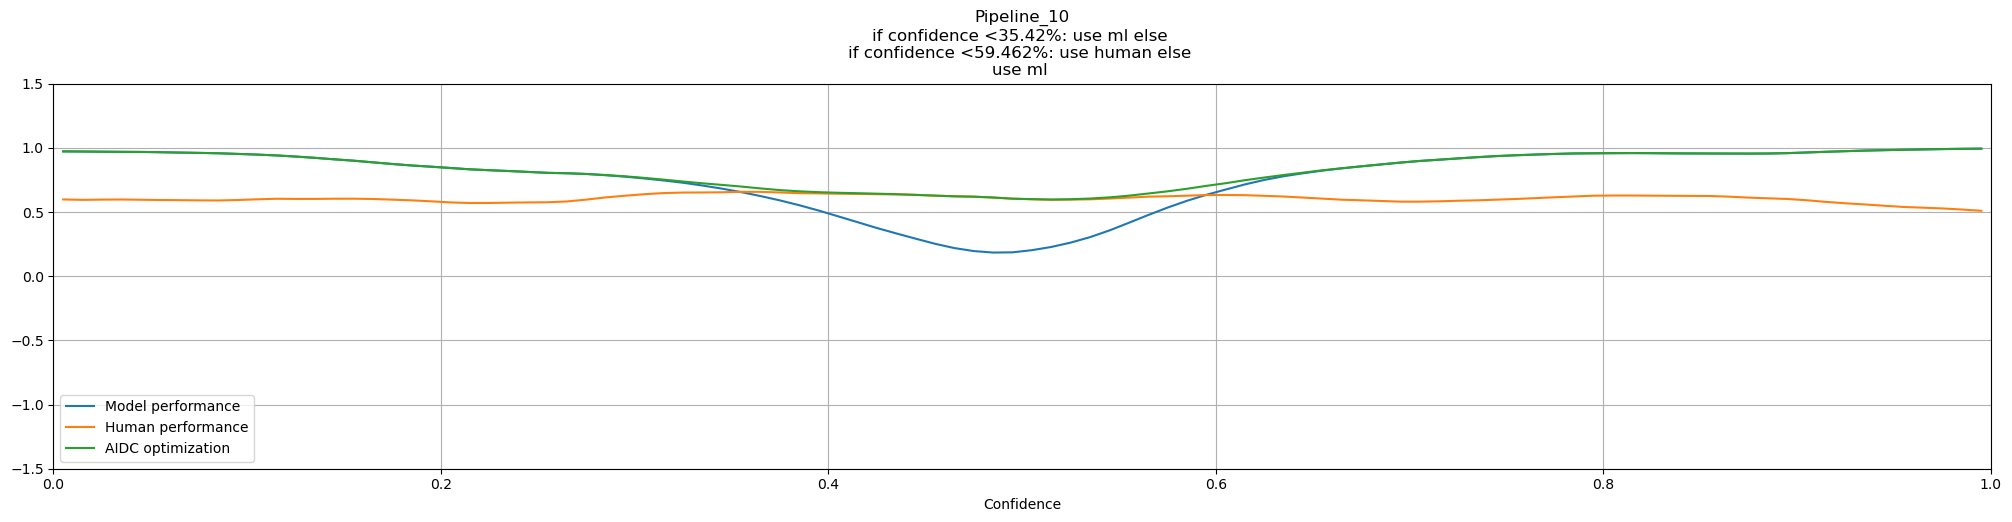

In [32]:
## Generate the default dispatch for all models
distribution_list=[]
performance_list=[]
graph_list=[]

for index in range(len(summary.index)):
            
    name=list(summary.index)[index]        
    print("Processing: "+ name)

    mlConfidence = mlConfidence_list[index]
    mlClass = mlClass_list[index]
    
    aidc_data=aidc_dataset
    aidc_data["mlClass"] = mlClass
    aidc_data["mlConfidence"] = mlConfidence
    aidc_data["hClass"] = hClass
    
    with sio.capture_output() as captured:
        tbcs=aidc.create_table_case_source({ 'name': "initial" })
        table = aidc.load_pandas_data(aidc_data)
        taskmodel_data={
          'id': "0",
          'name': "taskModel",
          'description': "aidc"
        }
    
        taskmodel=aidc.create_task_model(taskmodel_data)
        result = tbcs.build(table)    
        taskmodel.initFromBuiltCaseSource(tbcs, result)                
        scenario=taskmodel.getScenario()

        params = {
            "indicator": "Performance",
            "attribute": taskmodel.defaultConfidenceProvider  
        }

        stats=scenario.overviewStats(taskmodel,params)
        new_curves=scenario.exportOverviewStats(taskmodel,True,stats)

        dispatch_description=aidc.dispatch_description(taskmodel)
        
        global_statistics = aidc.output_global_stats(taskmodel)
        performance = aidc.get_analyses(taskmodel)
    
    distribution_list.append(dispatch_description)
    performance_list.append(str(performance))                
    
    df = pd.read_csv(io.StringIO(new_curves),sep='\t')
    graph_list.append(df)
    min_values=df.min()
    max_values=df.max()
    margin_factor=1.5
    min_performance=min(min_values[df.columns[df.columns.str.contains('performance')]])
    if -1 < min_performance < 1:
        min_performance = -1
    max_performance=max(max_values[df.columns[df.columns.str.contains('performance')]])
    if -1 < max_performance < 1:
        max_performance = 1
    min_limit=min_performance * margin_factor
    max_limit=max_performance * margin_factor
    df.plot(title=name +"\n" + dispatch_description ,xlabel="Confidence",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","initial scenario weighted average performance"],ylim=[min_limit,max_limit],xlim=[0,1],figsize=(25, 5),grid=True)
    plt.legend(["Model performance", "Human performance", "AIDC optimization"])
    plt.show()  

### Review the results and compare to model accuracy

In [18]:
## Compare the models
distribution_list_corrected=(list(map(lambda x: x.replace("\n",""), distribution_list)))
d = {'Pipeline': summary.index, 'Distribution': distribution_list_corrected, 'Performance': performance_list, 'AutoAI Accuracy': summary['holdout_accuracy']}
df = pd.DataFrame(data=d)
df["Performance"] = pd.to_numeric(df["Performance"])
df =df.sort_values(by=['Performance'],ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(df)
most_optimal=df["Pipeline"].values[0]
print("Most optimal: "+ most_optimal)

,Pipeline,Distribution,Performance,AutoAI Accuracy
Pipeline Name,,,,
Pipeline_8,Pipeline_8,if confidence <35.42%: use ml else if confidence <59.462%: use human else use ml,0.876638,0.741414
Pipeline_9,Pipeline_9,if confidence <35.42%: use ml else if confidence <59.462%: use human else use ml,0.876638,0.741414
Pipeline_10,Pipeline_10,if confidence <35.42%: use ml else if confidence <59.462%: use human else use ml,0.876638,0.741414
Pipeline_1,Pipeline_1,if confidence <42.933%: use ml else if confidence <67.85%: use human else use ml,0.851240,0.793939
Pipeline_6,Pipeline_6,if confidence <31.617%: use ml else if confidence <60.553%: use human else use ml,0.840758,0.749495
Pipeline_7,Pipeline_7,if confidence <31.617%: use ml else if confidence <60.553%: use human else use ml,0.840758,0.749495
Pipeline_3,Pipeline_3,if confidence <28.39%: use ml else if confidence <81.765%: use human else use ml,0.755291,0.781818
Pipeline_4,Pipeline_4,if confidence <28.39%: use ml else if confidence <81.765%: use human else use ml,0.755291,0.781818
Pipeline_5,Pipeline_5,if confidence <28.39%: use ml else if confidence <81.765%: use human else use ml,0.755291,0.781818


Most optimal: Pipeline_8


### Define the costs of decisions and impact of each decision in the confusion matrix

In [36]:
## Define the performance model
TruePositiveCost = "0"
FalsePositiveCost = "-LoanAmount*0.3"
FalseNegativeCost = "-LoanAmount*0.5"
TrueNegativeCost = "LoanAmount*0.3"
ModelDecisionCost = "-0.02"
HumanDecisionCost = "-0.05"

### Generate updated dispatch rules between human and AI

Processing: Pipeline_1


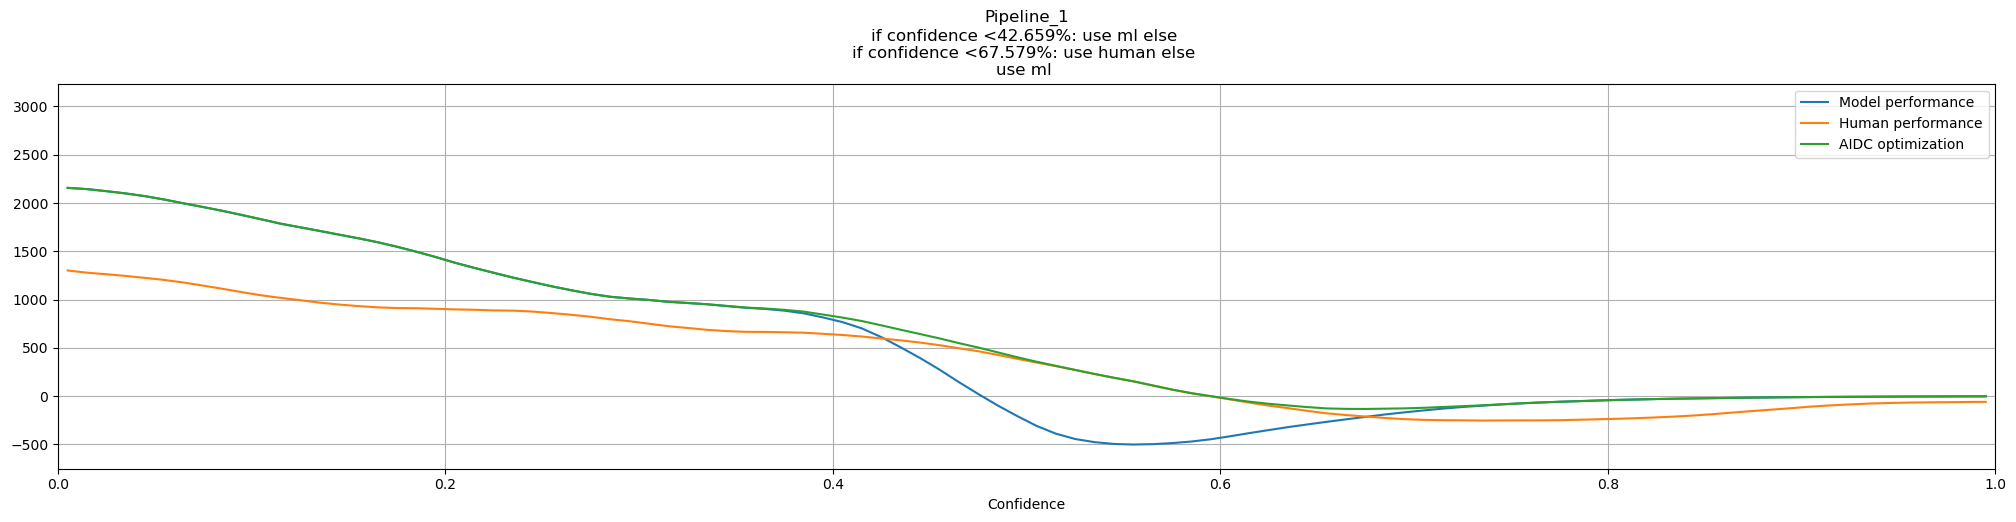

Processing: Pipeline_2


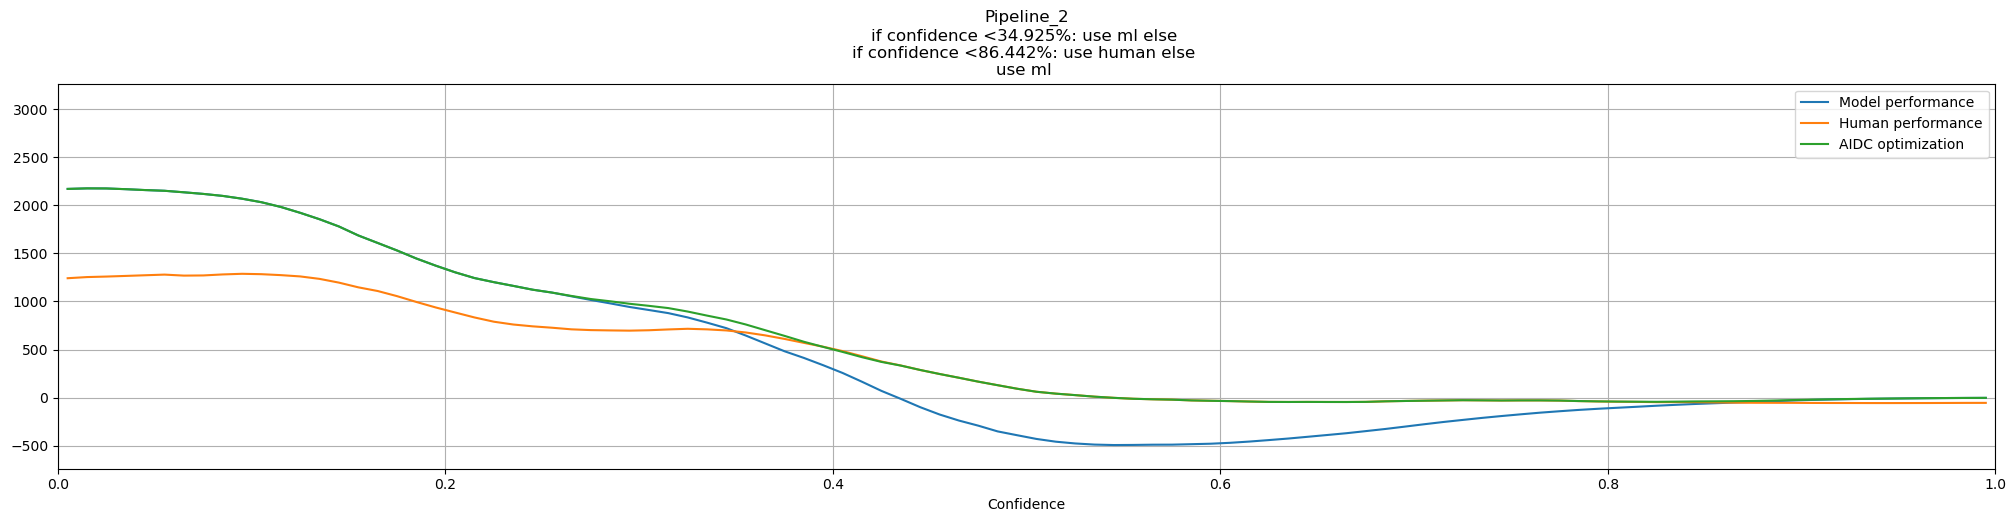

Processing: Pipeline_3


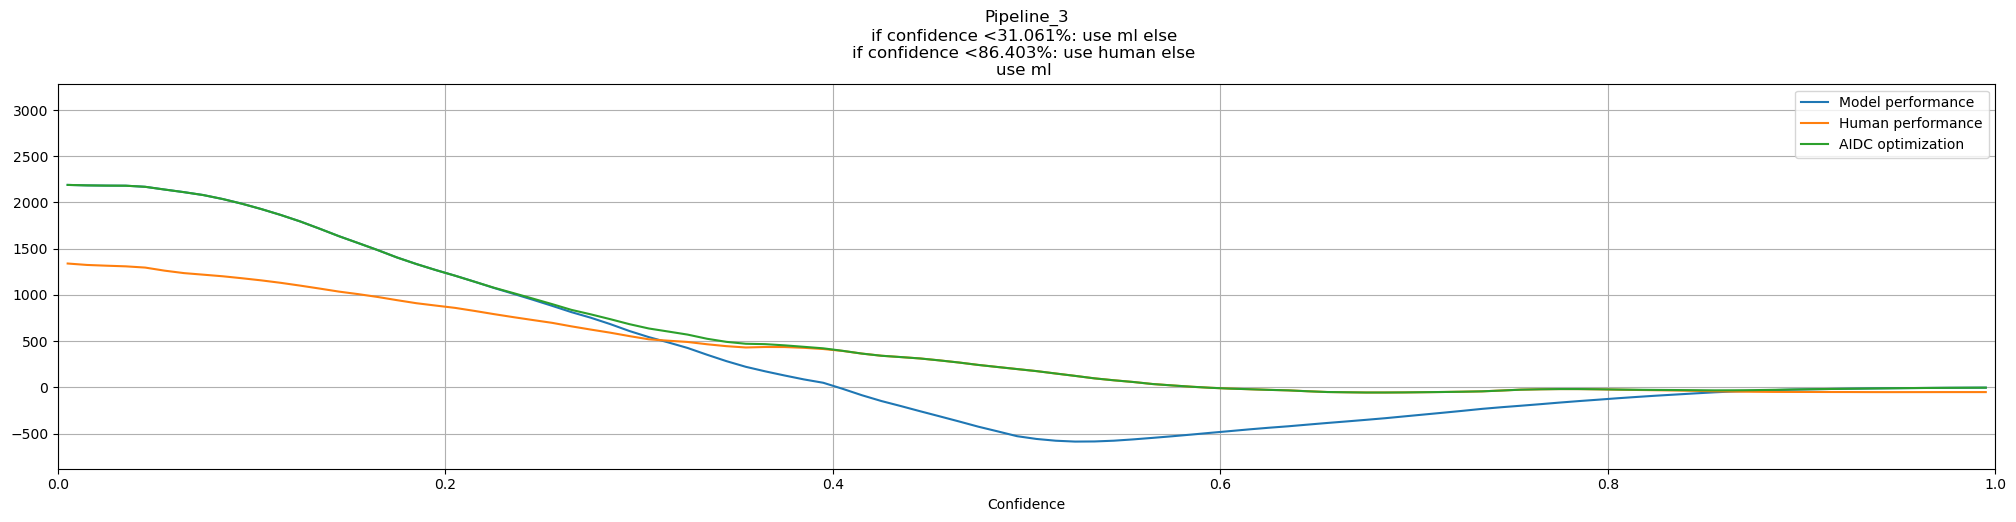

Processing: Pipeline_4


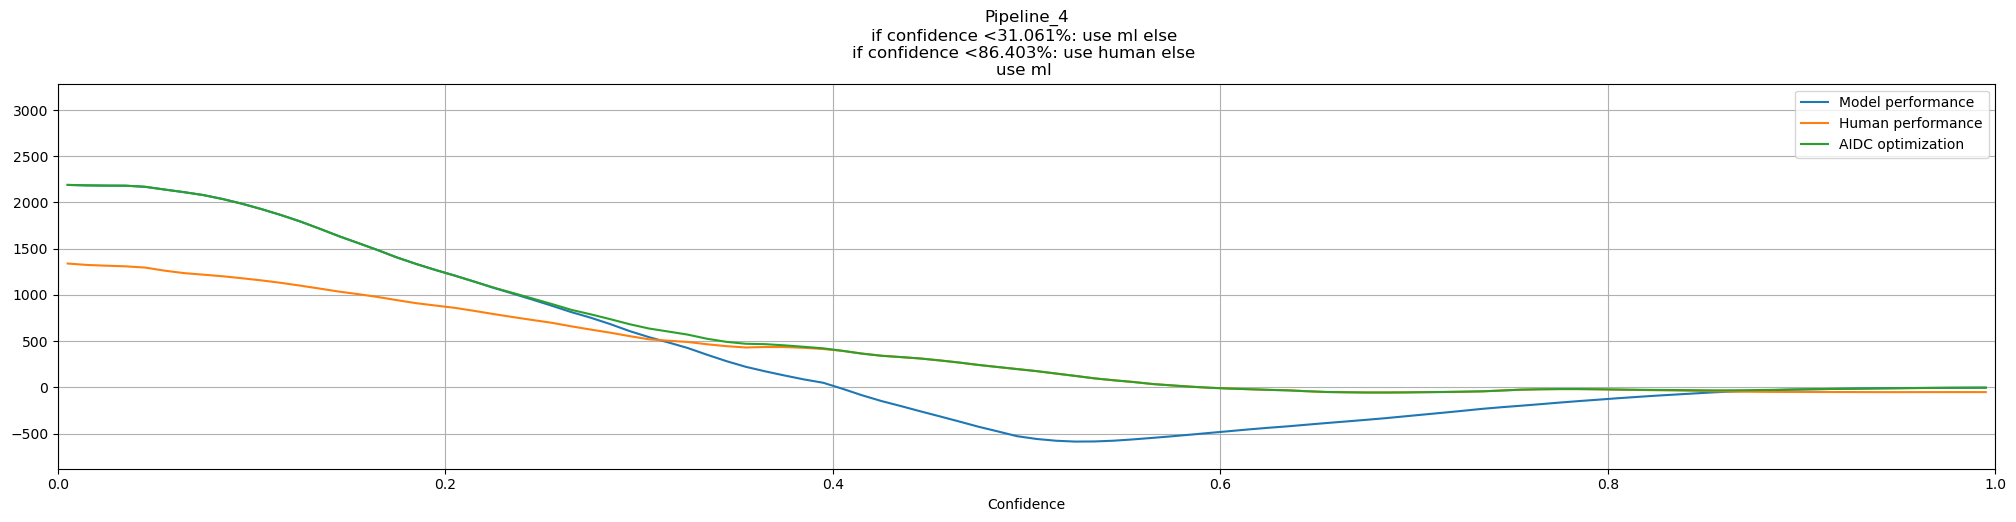

Processing: Pipeline_5


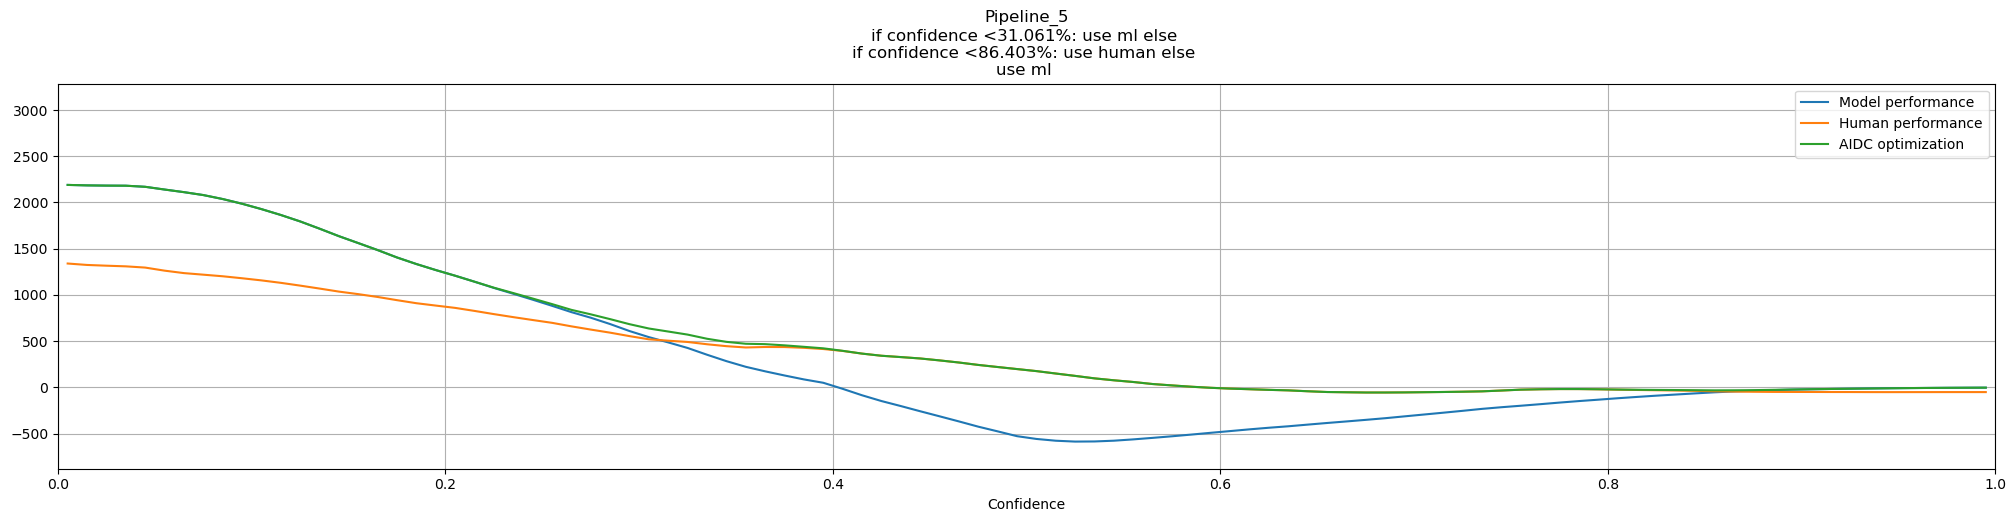

Processing: Pipeline_6


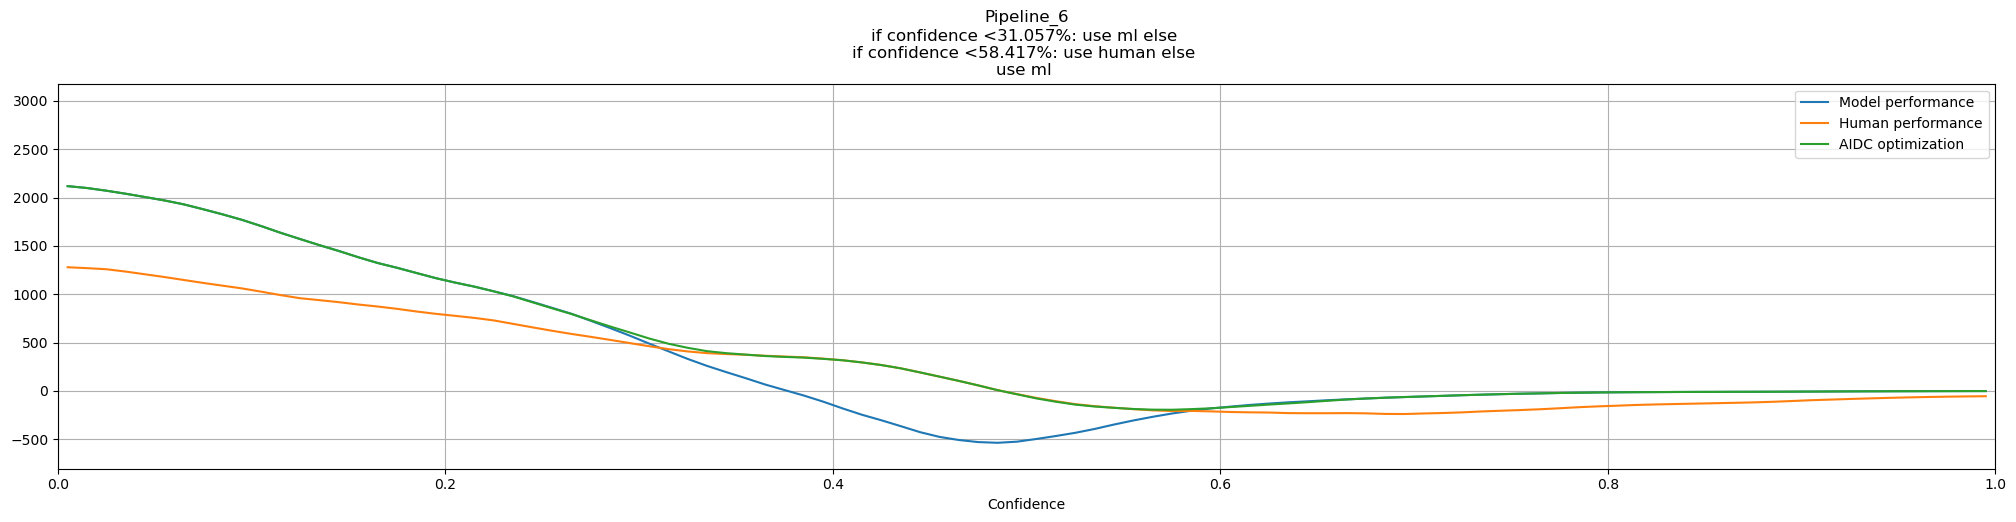

Processing: Pipeline_7


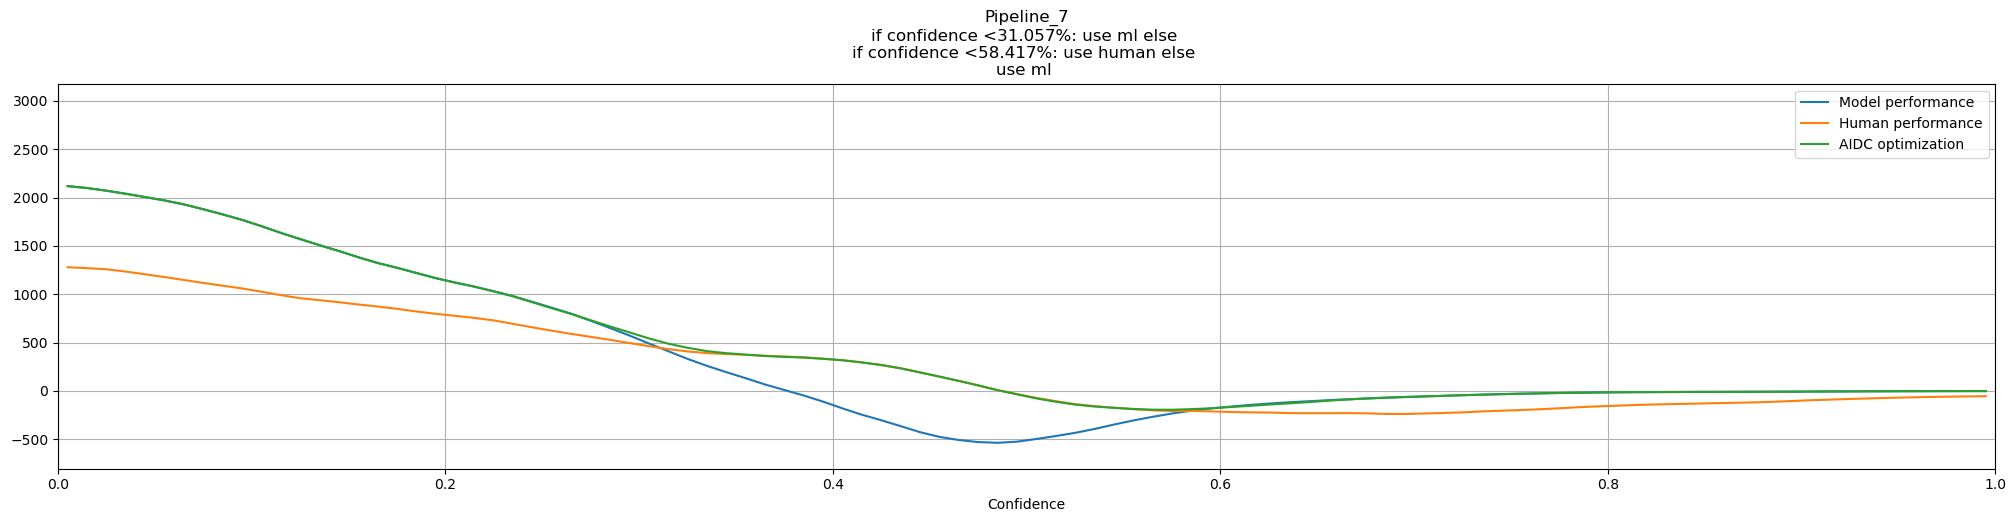

Processing: Pipeline_8


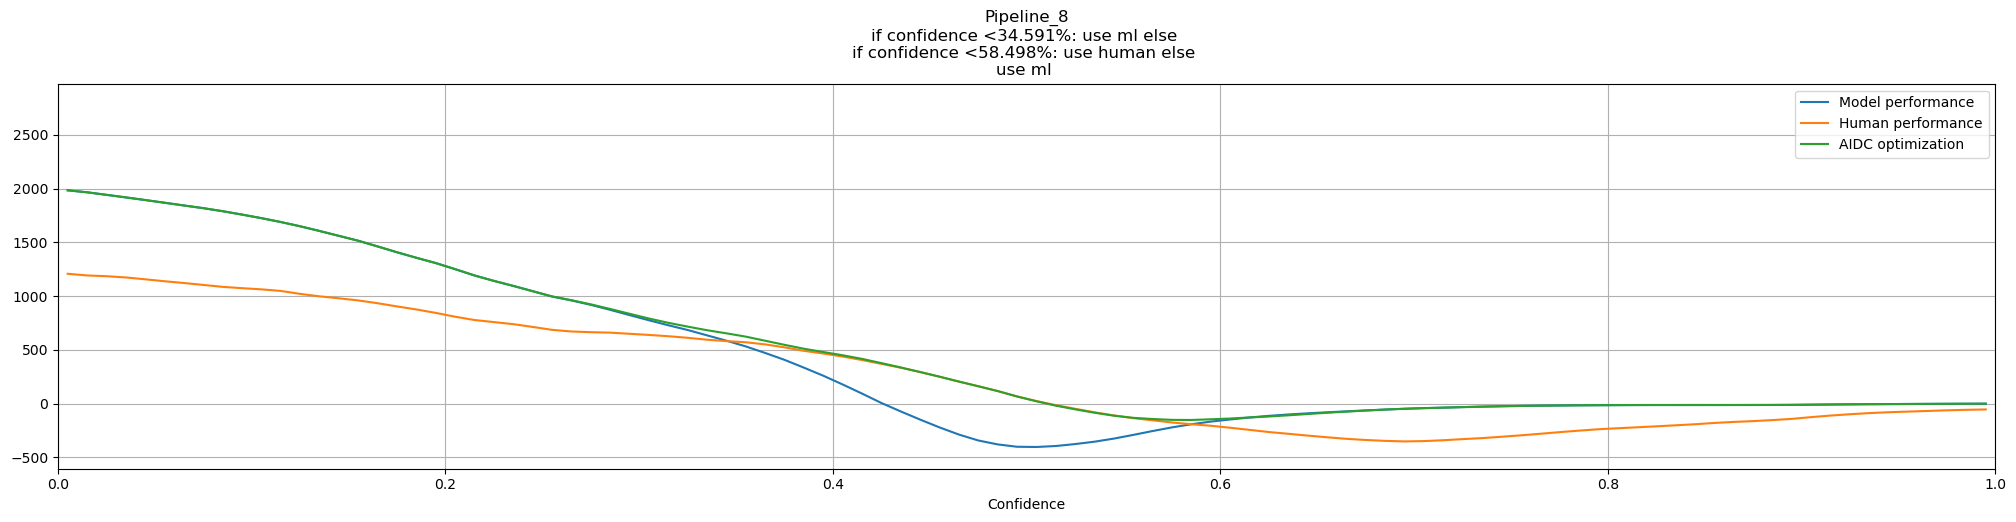

Processing: Pipeline_9


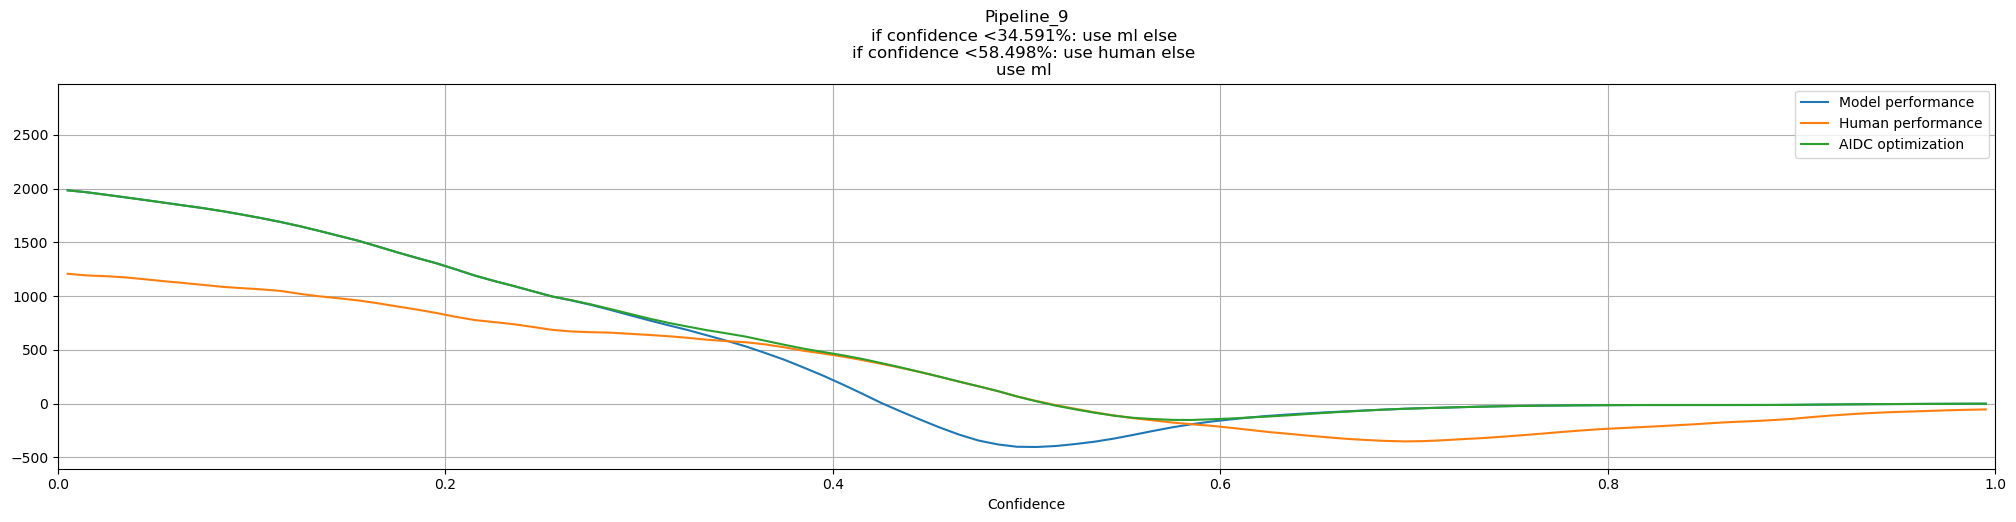

Processing: Pipeline_10


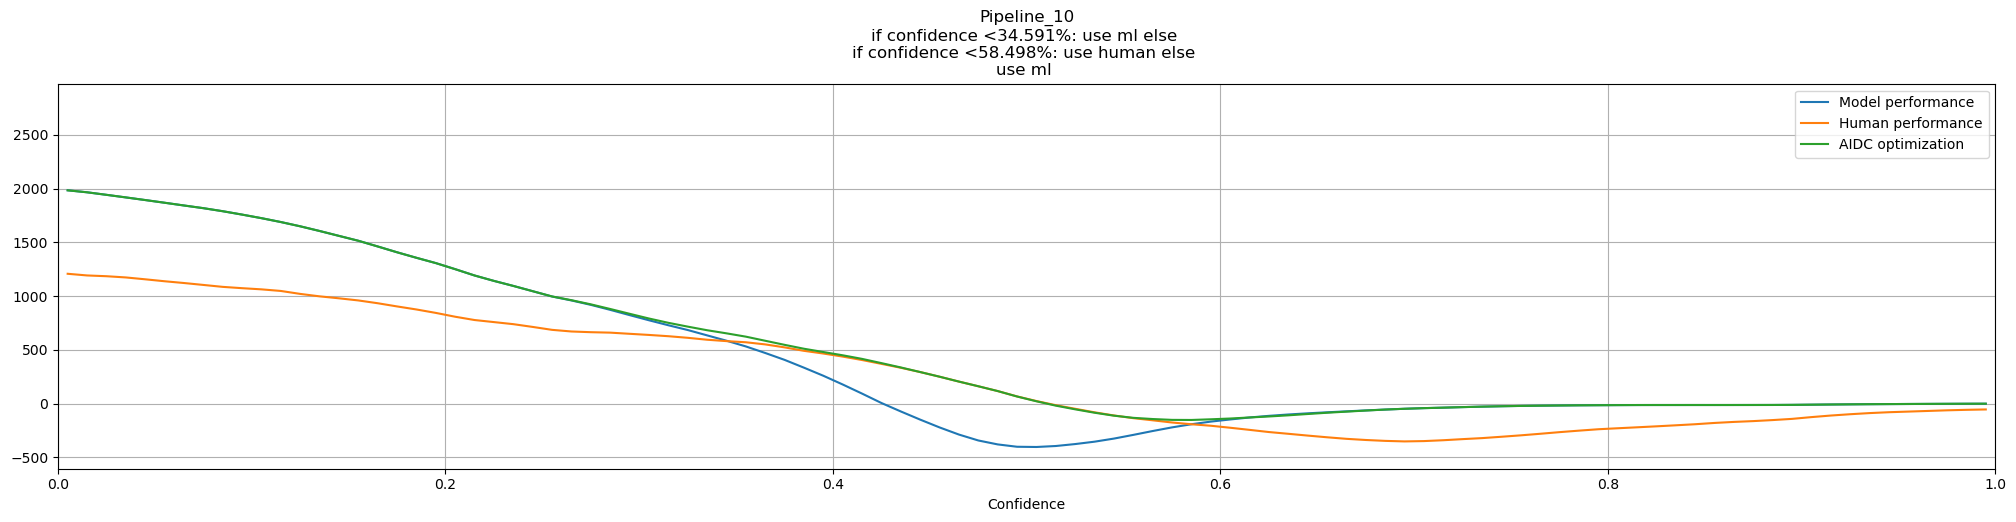

In [37]:
## Generate optimal dispatch for all models
distribution_list=[]
performance_list=[]
graph_list=[]

for index in range(len(summary.index)):
            
    name=list(summary.index)[index]        
    print("Processing: "+ name)

    mlConfidence = mlConfidence_list[index]
    mlClass = mlClass_list[index]
    
    aidc_data=aidc_dataset
    aidc_data["mlClass"] = mlClass
    aidc_data["mlConfidence"] = mlConfidence
    aidc_data["hClass"] = hClass
    
    with sio.capture_output() as captured:
        tbcs=aidc.create_table_case_source({ 'name': "initial" })
        table = aidc.load_pandas_data(aidc_data)
        taskmodel_data={
          'id': "0",
          'name': "taskModel",
          'description': "aidc"
        }
    
        taskmodel=aidc.create_task_model(taskmodel_data)
        result = tbcs.build(table)    
        taskmodel.initFromBuiltCaseSource(tbcs, result)        
        aidc.set_custom_indicators(taskmodel, TruePositiveCost, FalsePositiveCost, FalseNegativeCost, TrueNegativeCost, ModelDecisionCost, HumanDecisionCost)
        
        scenario=taskmodel.getScenario()

        params = {
            "indicator": "Performance",
            "attribute": taskmodel.defaultConfidenceProvider  
        }

        stats=scenario.overviewStats(taskmodel,params)
        new_curves=scenario.exportOverviewStats(taskmodel,True,stats)

        dispatch_description=aidc.dispatch_description(taskmodel)
        
        global_statistics = aidc.output_global_stats(taskmodel)
        performance = aidc.get_analyses(taskmodel)
    
    distribution_list.append(dispatch_description)
    performance_list.append(str(performance))                
    
    df = pd.read_csv(io.StringIO(new_curves),sep='\t')
    graph_list.append(df)
    min_values=df.min()
    max_values=df.max()
    margin_factor=1.5
    min_performance=min(min_values[df.columns[df.columns.str.contains('performance')]])
    if -1 < min_performance < 1:
        min_performance = -1
    max_performance=max(max_values[df.columns[df.columns.str.contains('performance')]])
    if -1 < max_performance < 1:
        max_performance = 1
    min_limit=min_performance * margin_factor
    max_limit=max_performance * margin_factor
    df.plot(title=name +"\n" + dispatch_description ,xlabel="Confidence",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","initial scenario weighted average performance"],ylim=[min_limit,max_limit],xlim=[0,1],figsize=(25, 5),grid=True)
    plt.legend(["Model performance", "Human performance", "AIDC optimization"])
    plt.show()  

### Review the updated results

In [38]:
## Compare the models
distribution_list_corrected=(list(map(lambda x: x.replace("\n",""), distribution_list)))
d = {'Pipeline': summary.index, 'Distribution': distribution_list_corrected, 'Performance': performance_list, 'AutoAI Accuracy': summary['holdout_accuracy']}
df = pd.DataFrame(data=d)
df["Performance"] = pd.to_numeric(df["Performance"])
df =df.sort_values(by=['Performance'],ascending=False)
with pd.option_context('display.max_colwidth', None):
    display(df)
most_optimal=df["Pipeline"].values[0]
print("Most optimal: "+ most_optimal)

,Pipeline,Distribution,Performance,AutoAI Accuracy
Pipeline Name,,,,
Pipeline_8,Pipeline_8,if confidence <34.591%: use ml else if confidence <58.498%: use human else use ml,368.792171,0.741414
Pipeline_9,Pipeline_9,if confidence <34.591%: use ml else if confidence <58.498%: use human else use ml,368.792171,0.741414
Pipeline_10,Pipeline_10,if confidence <34.591%: use ml else if confidence <58.498%: use human else use ml,368.792171,0.741414
Pipeline_1,Pipeline_1,if confidence <42.659%: use ml else if confidence <67.579%: use human else use ml,345.959764,0.793939
Pipeline_6,Pipeline_6,if confidence <31.057%: use ml else if confidence <58.417%: use human else use ml,330.777823,0.749495
Pipeline_7,Pipeline_7,if confidence <31.057%: use ml else if confidence <58.417%: use human else use ml,330.777823,0.749495
Pipeline_3,Pipeline_3,if confidence <31.061%: use ml else if confidence <86.403%: use human else use ml,246.996148,0.781818
Pipeline_4,Pipeline_4,if confidence <31.061%: use ml else if confidence <86.403%: use human else use ml,246.996148,0.781818
Pipeline_5,Pipeline_5,if confidence <31.061%: use ml else if confidence <86.403%: use human else use ml,246.996148,0.781818


Most optimal: Pipeline_8


### Calculate ROI

Total improvement:  1064486  over  4804  operations


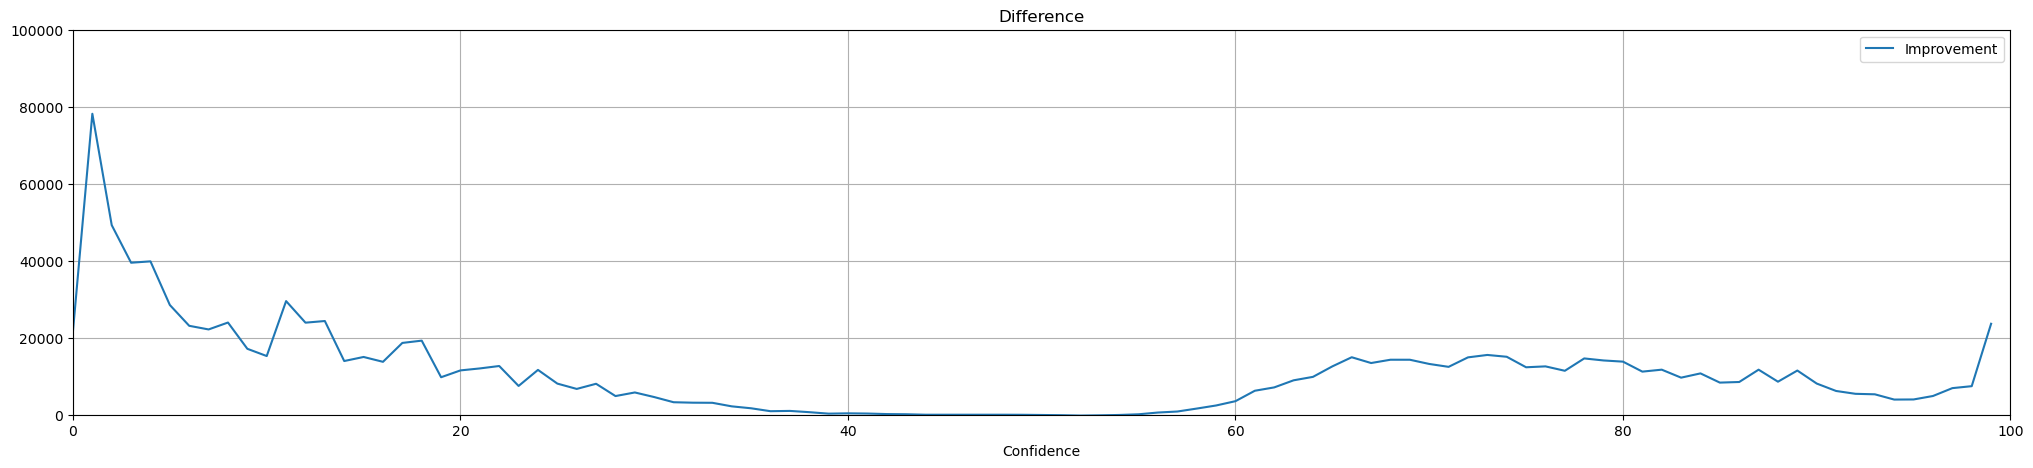

In [ ]:
#Collect the data of the most optimal model
for index in range(len(summary.index)):        
    name=list(summary.index)[index]   
    if name == most_optimal:
        df=graph_list[index]
        dispatch_description=distribution_list[index]
        mlConfidence = mlConfidence_list[index]
        mlClass = mlClass_list[index]
    
aidc_data=aidc_dataset
aidc_data["mlClass"] = mlClass
aidc_data["mlConfidence"] = mlConfidence
aidc_data["hClass"] = hClass
    
with sio.capture_output() as captured:
    tbcs=aidc.create_table_case_source({ 'name': "initial" })
    table = aidc.load_pandas_data(aidc_data)
    taskmodel_data={
        'id': "0",
        'name': "taskModel",
        'description': "aidc"
    }
    
    taskmodel=aidc.create_task_model(taskmodel_data)
    result = tbcs.build(table)    
    taskmodel.initFromBuiltCaseSource(tbcs, result)        
    aidc.set_custom_indicators(taskmodel, TruePositiveCost, FalsePositiveCost, FalseNegativeCost, TrueNegativeCost, ModelDecisionCost, HumanDecisionCost)
        
    scenario=taskmodel.getScenario()

    params = {
        "indicator": "Performance",
        "attribute": taskmodel.defaultConfidenceProvider  
    }

    stats=scenario.overviewStats(taskmodel,params)
    new_curves=scenario.exportOverviewStats(taskmodel,True,stats)
    dispatch_description=aidc.dispatch_description(taskmodel)
        
    global_statistics = aidc.output_global_stats(taskmodel)
    performance = aidc.get_analyses(taskmodel)

headerLabels= stats['curves'][scenario.selectedConfiguration]['headerLabels'].valueOf()
countColumn=headerLabels.index('count')
valueColumn=headerLabels.index('weightedAverage')

human_tool=""
for tool in (taskmodel['decisionTools']):
    if(taskmodel['decisionTools'][tool]['hasHuman'] == True):
        human_tool=tool
        
count_values=[]
human_values=[]
aidc_values=[]
human_total=[]
aidc_total=[]
difference_total=[]
for i in range(100):
    count_values.append(stats['curves'][scenario.selectedConfiguration]['content'][i][countColumn])
    human_values.append(stats['curves'][human_tool]['content'][i][valueColumn])
    aidc_values.append(stats['curves'][scenario.selectedConfiguration]['content'][i][valueColumn])
    human_total.append(count_values[i]*human_values[i])
    aidc_total.append(count_values[i]*aidc_values[i])
    difference_total.append(aidc_total[i]-human_total[i])
    

data={'Count':count_values,'Human':human_values,'AIDC':aidc_values,'Human Total':human_total,"AIDC Total":aidc_total,"Improvement":difference_total}
df = pd.DataFrame(data)

print("Total improvement: " , round(df['Improvement'].sum()), " over ", df['Count'].sum(), " operations")
df.plot(title='Difference',xlabel="Confidence" ,y=["Improvement"],ylim=[0,100000],xlim=[0,100],figsize=(25, 5),grid=True)
plt.show() 

### Deploy the most optimal model based on the above results

In [22]:
## Deploy the most optimal model
service.create(
            model=most_optimal,
            metadata=experiment_metadata,
            deployment_name='most_optimal_model'
)
serving_url=service.get_params()["entity"]["status"]["serving_urls"][0]
serving_url

Preparing an AutoAI Deployment...
Published model uid: f36de825-f0a1-4a2b-8ff5-2425a81dadfd
Deploying model f36de825-f0a1-4a2b-8ff5-2425a81dadfd using V4 client.


#######################################################################################

Synchronous deployment creation for uid: 'f36de825-f0a1-4a2b-8ff5-2425a81dadfd' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.......
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5567f63d-cd60-4d28-af6c-b08752389d3d'
------------------------------------------------------------------------------------------------


Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.


'https://internal-nginx-svc.cpd-instance.svc.cluster.local:12443/ml/v4/deployments/5567f63d-cd60-4d28-af6c-b08752389d3d/predictions'

### [Optional] Upload the results to AIFactsheets

2023/08/25 11:46:34 INFO : Experiment successfully created with ID 2 and name aidc
2023/08/25 11:46:34 INFO : Autolog enabled Successfully
2023/08/25 11:46:35 INFO : Current model information: {'asset_id': '6019d525-0c82-4362-96c2-6d1f98a42fd3 ', 'container_type': 'space', 'container_id': '703fea20-9b1e-4712-8e8d-726220a5f671', 'facts_type': 'modelfacts_user'}
2023/08/25 11:46:36 INFO : Attachment uploaded successfully and access url (15min valid) is - https://internal-nginx-svc.cpd-instance.svc.cluster.local:12443/v2/asset_files/768e26ab-3cb7-4783-9b56-fc39b489f723/6019d525-0c82-4362-96c2-6d1f98a42fd3/1e9b6169-393a-4ed0-bf8c-6c4a71b24b21?space_id=703fea20-9b1e-4712-8e8d-726220a5f671&signature=gcm-dZ50u8Hv%2F7QW2GSTEh4GxQ%3D%3D%3BGjJC%2FD7AkuZGDP8zogXTjQ%3D%3D%3At8HkXKU4DOTkWMnw%2F9lxr3aAzG8QyxdGOkse48uQoSbmKgVHM4DS7v8j5iRylTAOsCU3ohUlSONzMpaK61GteJFTDd%2BHQEC7JfInoeu5ZA07KQTLs0Rzief%2F8%2FIUNcmOjuOdD4uXcnjchG9e%2FncEHMyOMvEUqJUO%2FqRRxK4S%2BZMWGHeszR64jHW%2BA4sedOv4NR18%2FKxRxeN7efZQH

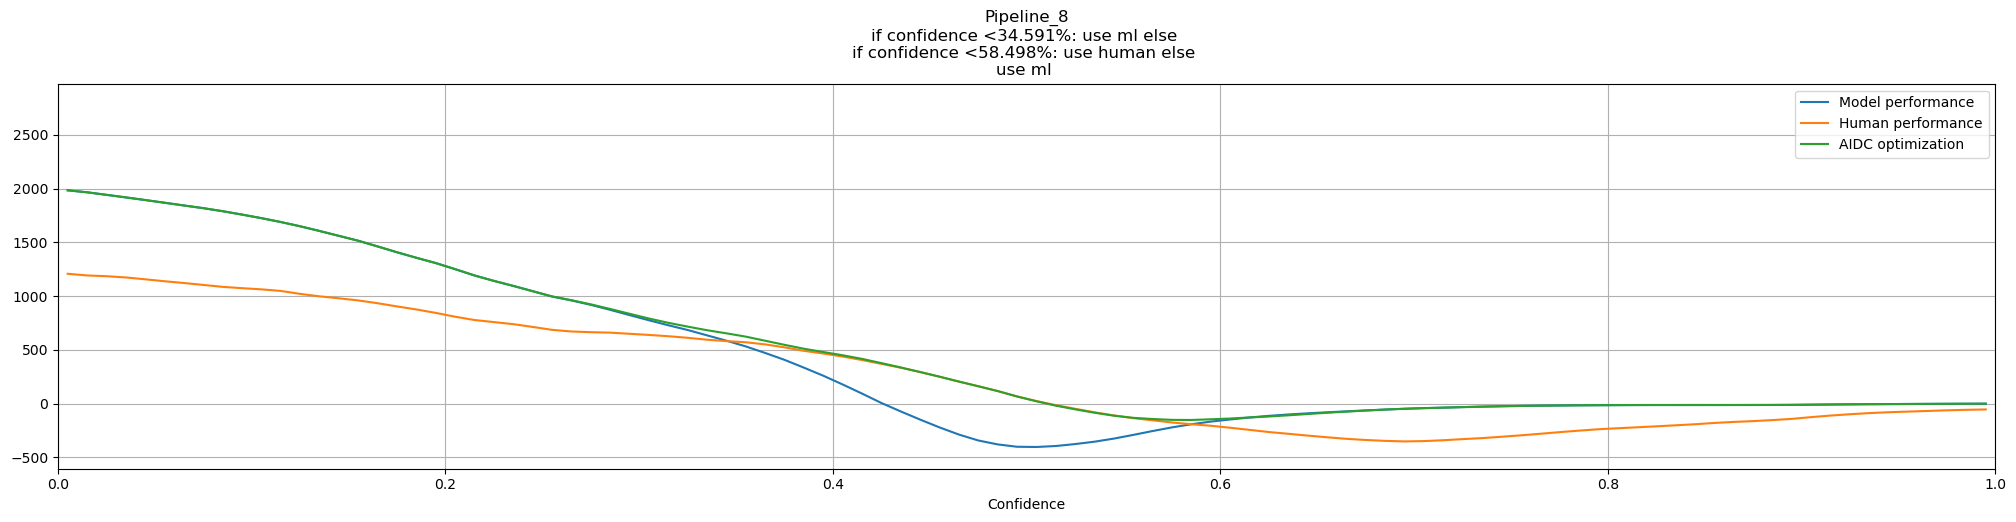

In [42]:
## Add the details to AI Factsheets
try:
    from ibm_aigov_facts_client import AIGovFactsClient,CloudPakforDataConfig
except:
    !pip install -U packaging==21.3    
    !pip install -U ibm-aigov-facts-client
    from ibm_aigov_facts_client import AIGovFactsClient,CloudPakforDataConfig

#Save the graph
df = pd.read_csv(io.StringIO(new_curves),sep='\t')
filename="/project_data/data_asset/graph.png"
min_values=df.min()
max_values=df.max()
margin_factor=1.5
min_performance=min(min_values[df.columns[df.columns.str.contains('performance')]])
if -1 < min_performance < 1:
    min_performance = -1
max_performance=max(max_values[df.columns[df.columns.str.contains('performance')]])
if -1 < max_performance < 1:
    max_performance = 1
min_limit=min_performance * margin_factor
max_limit=max_performance * margin_factor
df.plot(title=most_optimal +"\n" + dispatch_description ,xlabel="Confidence",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","initial scenario weighted average performance"],ylim=[min_limit,max_limit],xlim=[0,1],figsize=(25, 5),grid=True)
plt.legend(["Model performance", "Human performance", "AIDC optimization"])
plt.savefig(filename)


#Upload the graph
cpd_creds = CloudPakforDataConfig(service_url=os.environ.get("RUNTIME_ENV_APSX_URL"), username="admin", password="password")
facts_client = AIGovFactsClient(experiment_name="aidc",container_type="project",container_id=experiment_metadata['project_id'],cloud_pak_for_data_configs=cpd_creds)
model = facts_client.assets.get_model(model_id=service.get_params()["entity"]['asset']['id'],container_type="space",container_id=target_space_id)
model.set_attachment_fact(file_to_upload=filename,description="Line graph",fact_id="aidc",html_rendering_hint="inline_image")

### Save the most optimal decision rules as JSON

In [25]:
## Export the most optimal model to JSON
import json
model_export=aidc.export_model(taskmodel)

## Save the most optimal AIDC rules
from project_lib import Project
from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space()
token = wslib.auth.get_current_token()
project = Project(project_id=experiment_metadata['project_id'], project_access_token=token)
project.save_data(file_name = "AIDC_model.json",data = json.dumps(model_export.valueOf()).encode('utf-8'),overwrite=True)

{'file_name': 'AIDC_model.json',
 'message': 'File saved to project storage.',
 'asset_id': '53886ba6-639b-4891-85b9-35d2798eb569'}